<a href="https://colab.research.google.com/github/JananiSriSK/Solar_panel_regression/blob/main/Solar_panel_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SolarPowerGeneration Project

### Objective:
To predict solar energy production using environmental factors through various regression models.

## Exploratory Data Analysis

In [ ]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Load Data
data = pd.read_csv("../Solar_panel_regression/dataset/solarpowergeneration.csv")

In [ ]:
df = data.copy()

In [ ]:
df.head()

,distance-to-solar-noon,temperature,wind-direction,wind-speed,sky-cover,visibility,humidity,average-wind-speed-(period),average-pressure-(period),power-generated
0,0.859897,69,28,7.5,0,10.0,75,8.0,29.82,0
1,0.628535,69,28,7.5,0,10.0,77,5.0,29.85,0
2,0.397172,69,28,7.5,0,10.0,70,0.0,29.89,5418
3,0.165810,69,28,7.5,0,10.0,33,0.0,29.91,25477
4,0.065553,69,28,7.5,0,10.0,21,3.0,29.89,30069


In [ ]:
df.shape

(2920, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2920 entries, 0 to 2919
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   distance-to-solar-noon       2920 non-null   float64
 1   temperature                  2920 non-null   int64  
 2   wind-direction               2920 non-null   int64  
 3   wind-speed                   2920 non-null   float64
 4   sky-cover                    2920 non-null   int64  
 5   visibility                   2920 non-null   float64
 6   humidity                     2920 non-null   int64  
 7   average-wind-speed-(period)  2919 non-null   float64
 8   average-pressure-(period)    2920 non-null   float64
 9   power-generated              2920 non-null   int64  
dtypes: float64(5), int64(5)
memory usage: 228.3 KB


In [ ]:
df.describe()

,distance-to-solar-noon,temperature,wind-direction,wind-speed,sky-cover,visibility,humidity,average-wind-speed-(period),average-pressure-(period),power-generated
count,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2919.000000,2920.000000,2920.000000
mean,0.503294,58.468493,24.953425,10.096986,1.987671,9.557705,73.513699,10.129154,30.017760,6979.846233
std,0.298024,6.841200,6.915178,4.838185,1.411978,1.383884,15.077139,7.261547,0.142006,10312.336413
min,0.050401,42.000000,1.000000,1.100000,0.000000,0.000000,14.000000,0.000000,29.480000,0.000000
25%,0.243714,53.000000,25.000000,6.600000,1.000000,10.000000,65.000000,5.000000,29.920000,0.000000
50%,0.478957,59.000000,27.000000,10.000000,2.000000,10.000000,77.000000,9.000000,30.000000,404.000000
75%,0.739528,63.000000,29.000000,13.100000,3.000000,10.000000,84.000000,15.000000,30.110000,12723.500000
max,1.141361,78.000000,36.000000,26.600000,4.000000,10.000000,100.000000,40.000000,30.530000,36580.000000


### Histogram for All Features

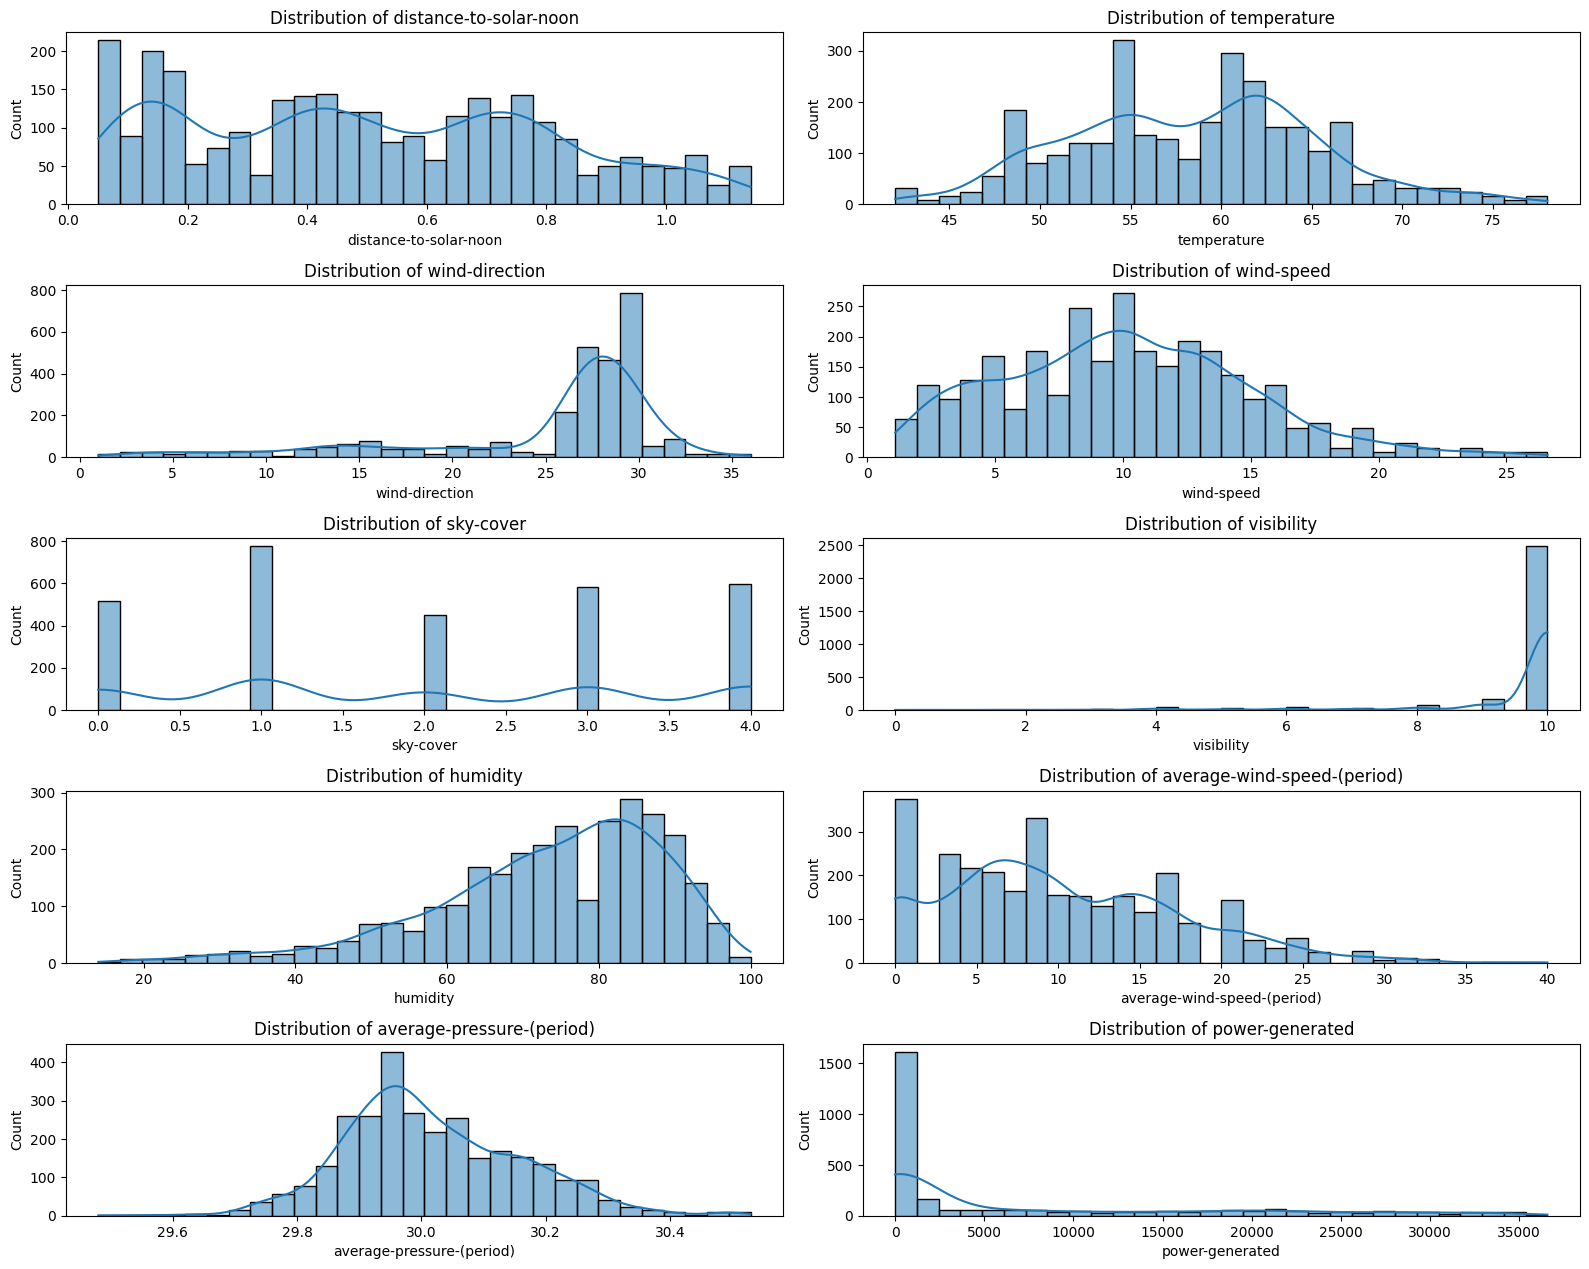

In [ ]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(16, 25))
for i, col in enumerate(numeric_cols):
    plt.subplot(len(numeric_cols), 2, i + 1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

### Check for Missing Values

In [ ]:
# Check number of missing values per column
print(df.isnull().sum())

distance-to-solar-noon         0
temperature                    0
wind-direction                 0
wind-speed                     0
sky-cover                      0
visibility                     0
humidity                       0
average-wind-speed-(period)    1
average-pressure-(period)      0
power-generated                0
dtype: int64


### Handling Missing Values

In [ ]:
df['average-wind-speed-(period)']=df['average-wind-speed-(period)'].fillna(df['average-wind-speed-(period)'].median())

### Confirm All Missing Values Are Handled

In [ ]:
print("Remaining missing values:\n")
df.isnull().sum()

Remaining missing values:



distance-to-solar-noon         0
temperature                    0
wind-direction                 0
wind-speed                     0
sky-cover                      0
visibility                     0
humidity                       0
average-wind-speed-(period)    0
average-pressure-(period)      0
power-generated                0
dtype: int64

### Check for Duplicate Rows

In [ ]:
# Count duplicate rows
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 0


###  Drop the Column

In [ ]:
print(df['visibility'].value_counts())

10.00    2491
9.00      169
8.00       73
4.00       43
6.00       42
7.00       36
5.00       29
3.00       14
1.50        6
0.25        4
2.50        4
2.00        2
0.50        2
1.75        2
0.00        1
0.75        1
1.25        1
Name: visibility, dtype: int64


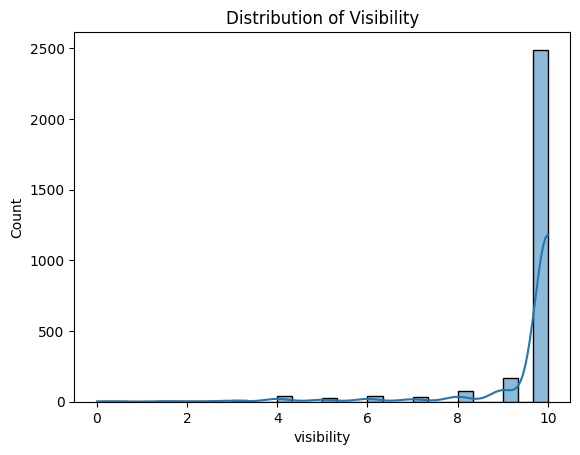

In [ ]:
sns.histplot(df['visibility'], kde=True, bins=30)
plt.title("Distribution of Visibility")
plt.show()

In [ ]:
df['visibility'].describe()

count    2920.000000
mean        9.557705
std         1.383884
min         0.000000
25%        10.000000
50%        10.000000
75%        10.000000
max        10.000000
Name: visibility, dtype: float64

In [ ]:
df.drop(columns=['visibility'], inplace=True)

### Outlier Detection and Handling

### Visual Outlier Detection using Boxplots

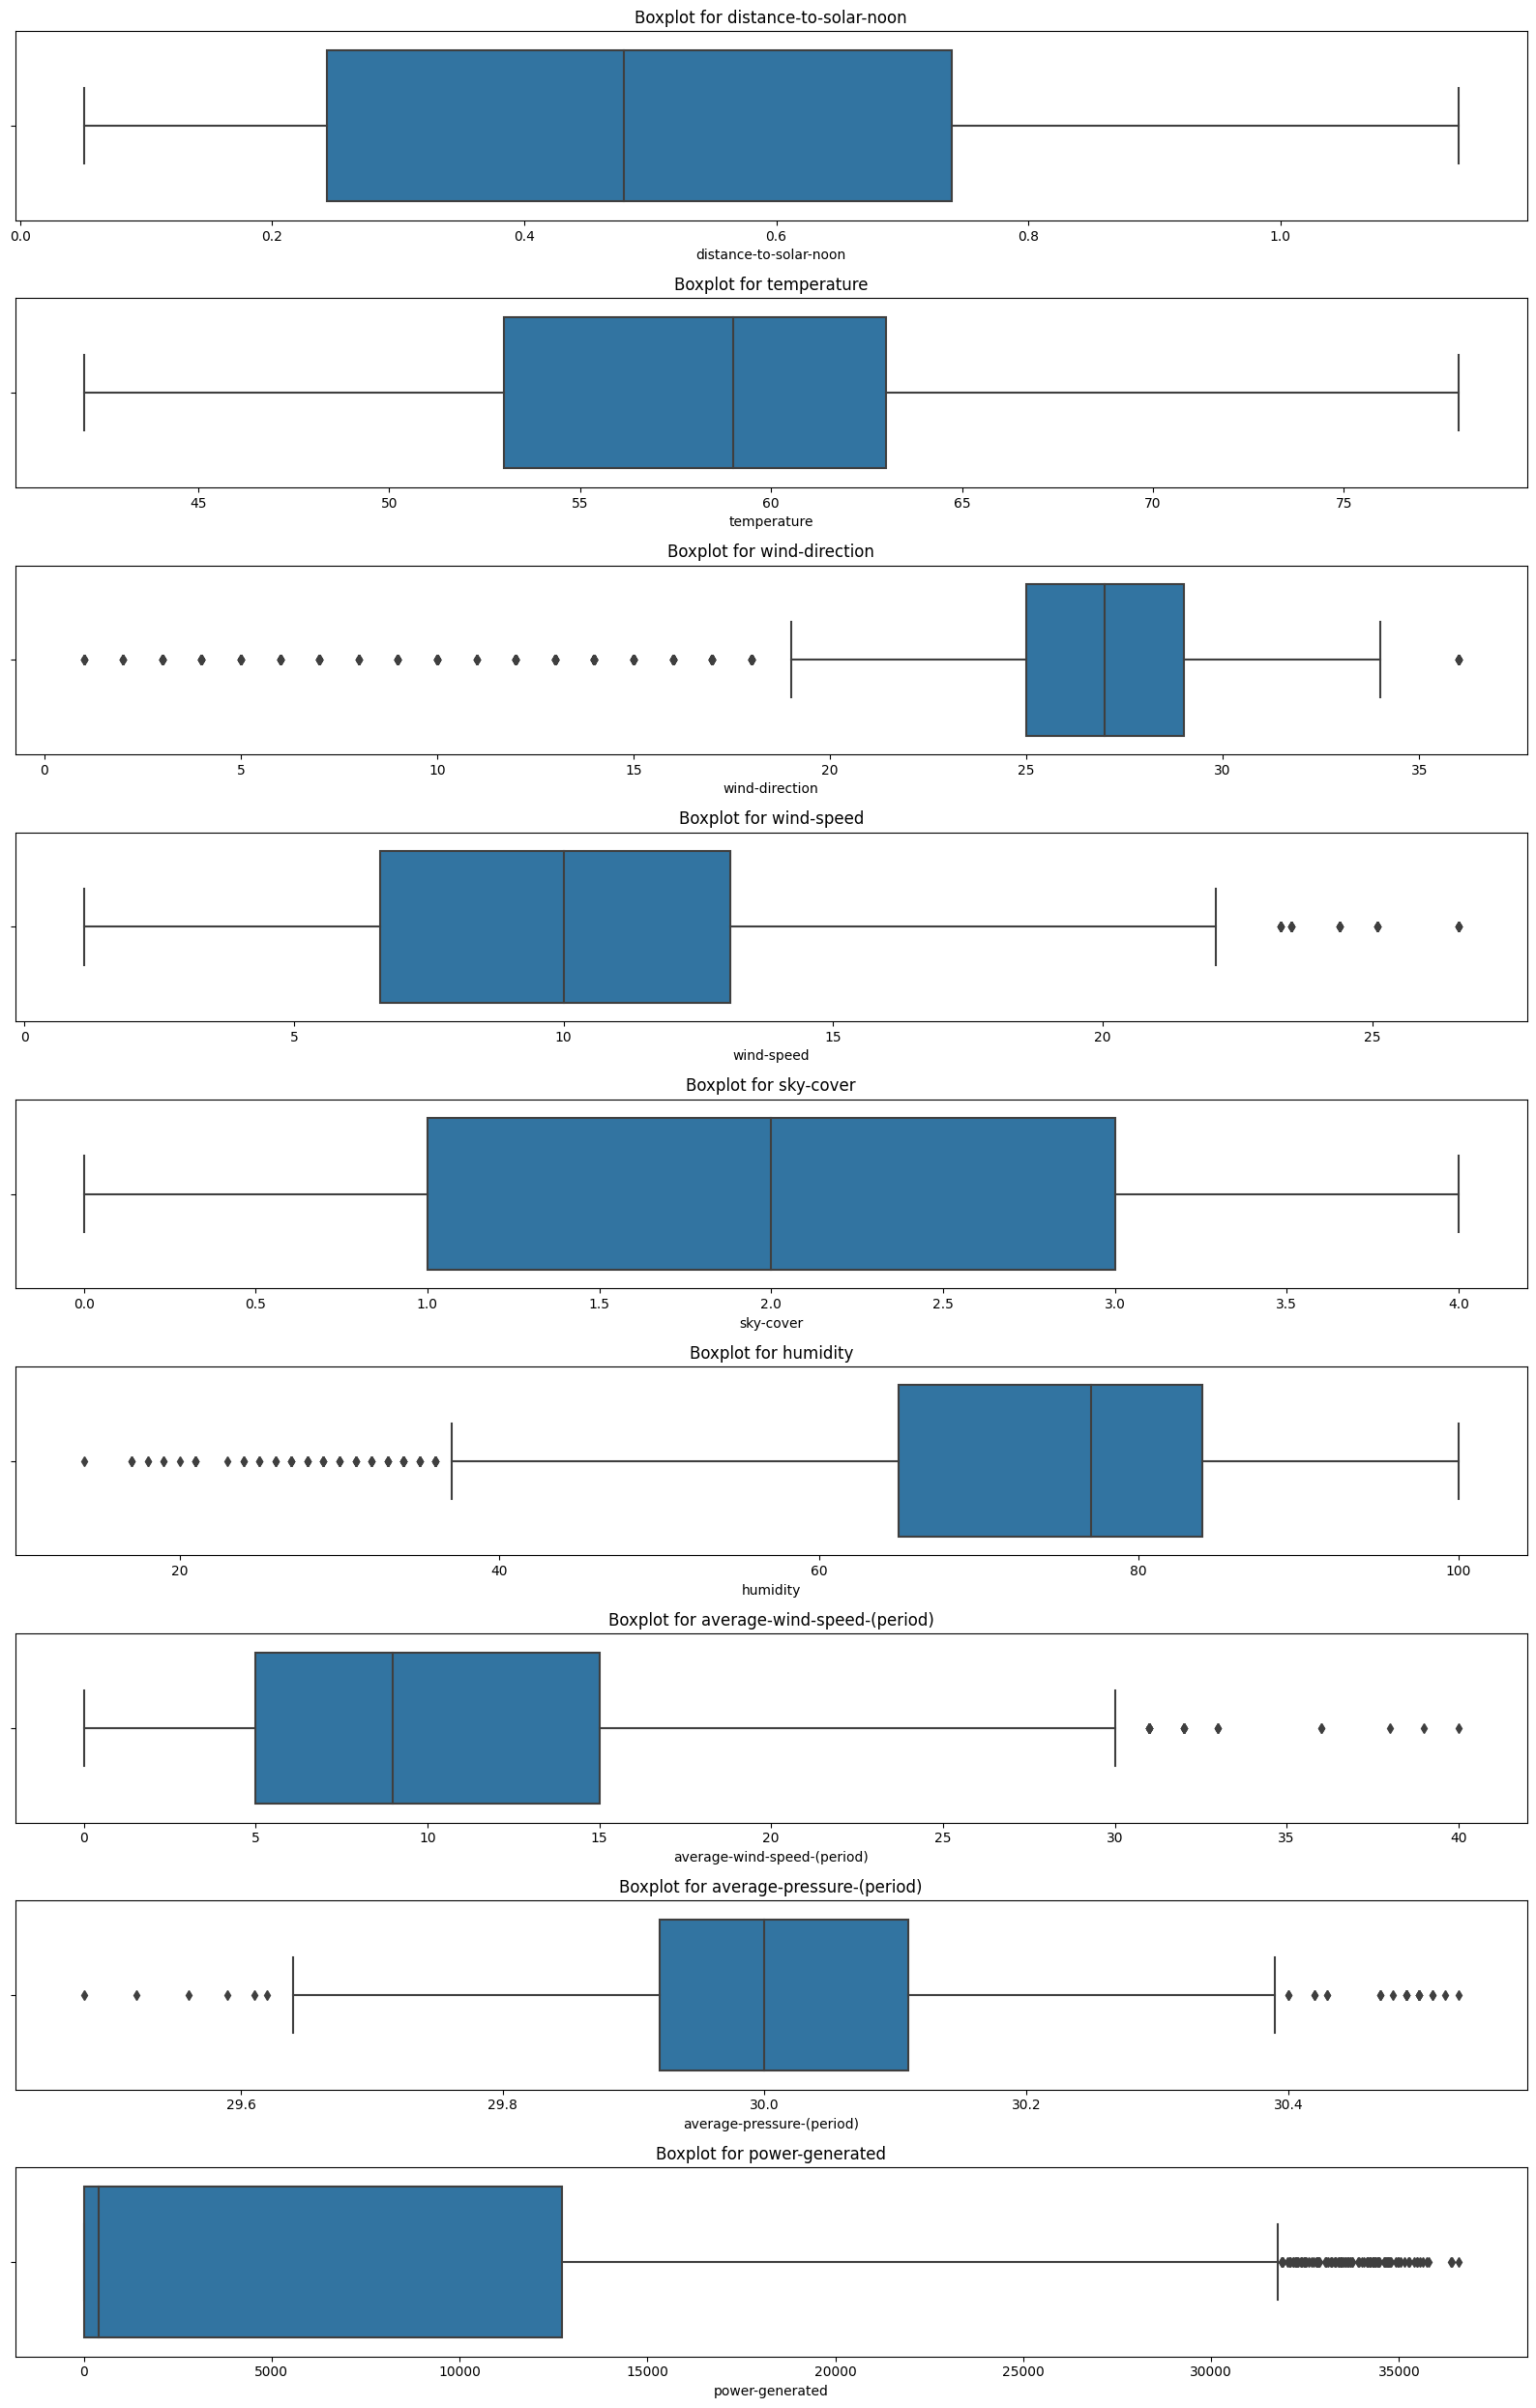

In [ ]:
# Numeric columns only
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(16, 25))
for i, col in enumerate(numeric_cols):
    plt.subplot(len(numeric_cols), 1, i + 1)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot for {col}')
plt.tight_layout()
plt.show()

### Outlier Detection using IQR (Interquartile Range)

In [ ]:
def detect_outliers_iqr(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = data[(data[col] < lower) | (data[col] > upper)]
    return len(outliers)

# Detect outliers in all numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

outlier_counts = {}

for col in numeric_cols:
    count = detect_outliers_iqr(df, col)
    outlier_counts[col] = count

# Display results
for col, count in outlier_counts.items():
    print(f"Number of outliers in '{col}': {count}")

Number of outliers in 'distance-to-solar-noon': 0
Number of outliers in 'temperature': 0
Number of outliers in 'wind-direction': 528
Number of outliers in 'wind-speed': 40
Number of outliers in 'sky-cover': 0
Number of outliers in 'humidity': 83
Number of outliers in 'average-wind-speed-(period)': 25
Number of outliers in 'average-pressure-(period)': 31
Number of outliers in 'power-generated': 107


###  Handling Outliers

### Cap Outliers

In [ ]:
def cap_outliers(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    data[col] = np.where(data[col] < lower, lower, data[col])
    data[col] = np.where(data[col] > upper, upper, data[col])
    return data

# Apply to all numeric columns
for col in numeric_cols:
    df = cap_outliers(df, col)

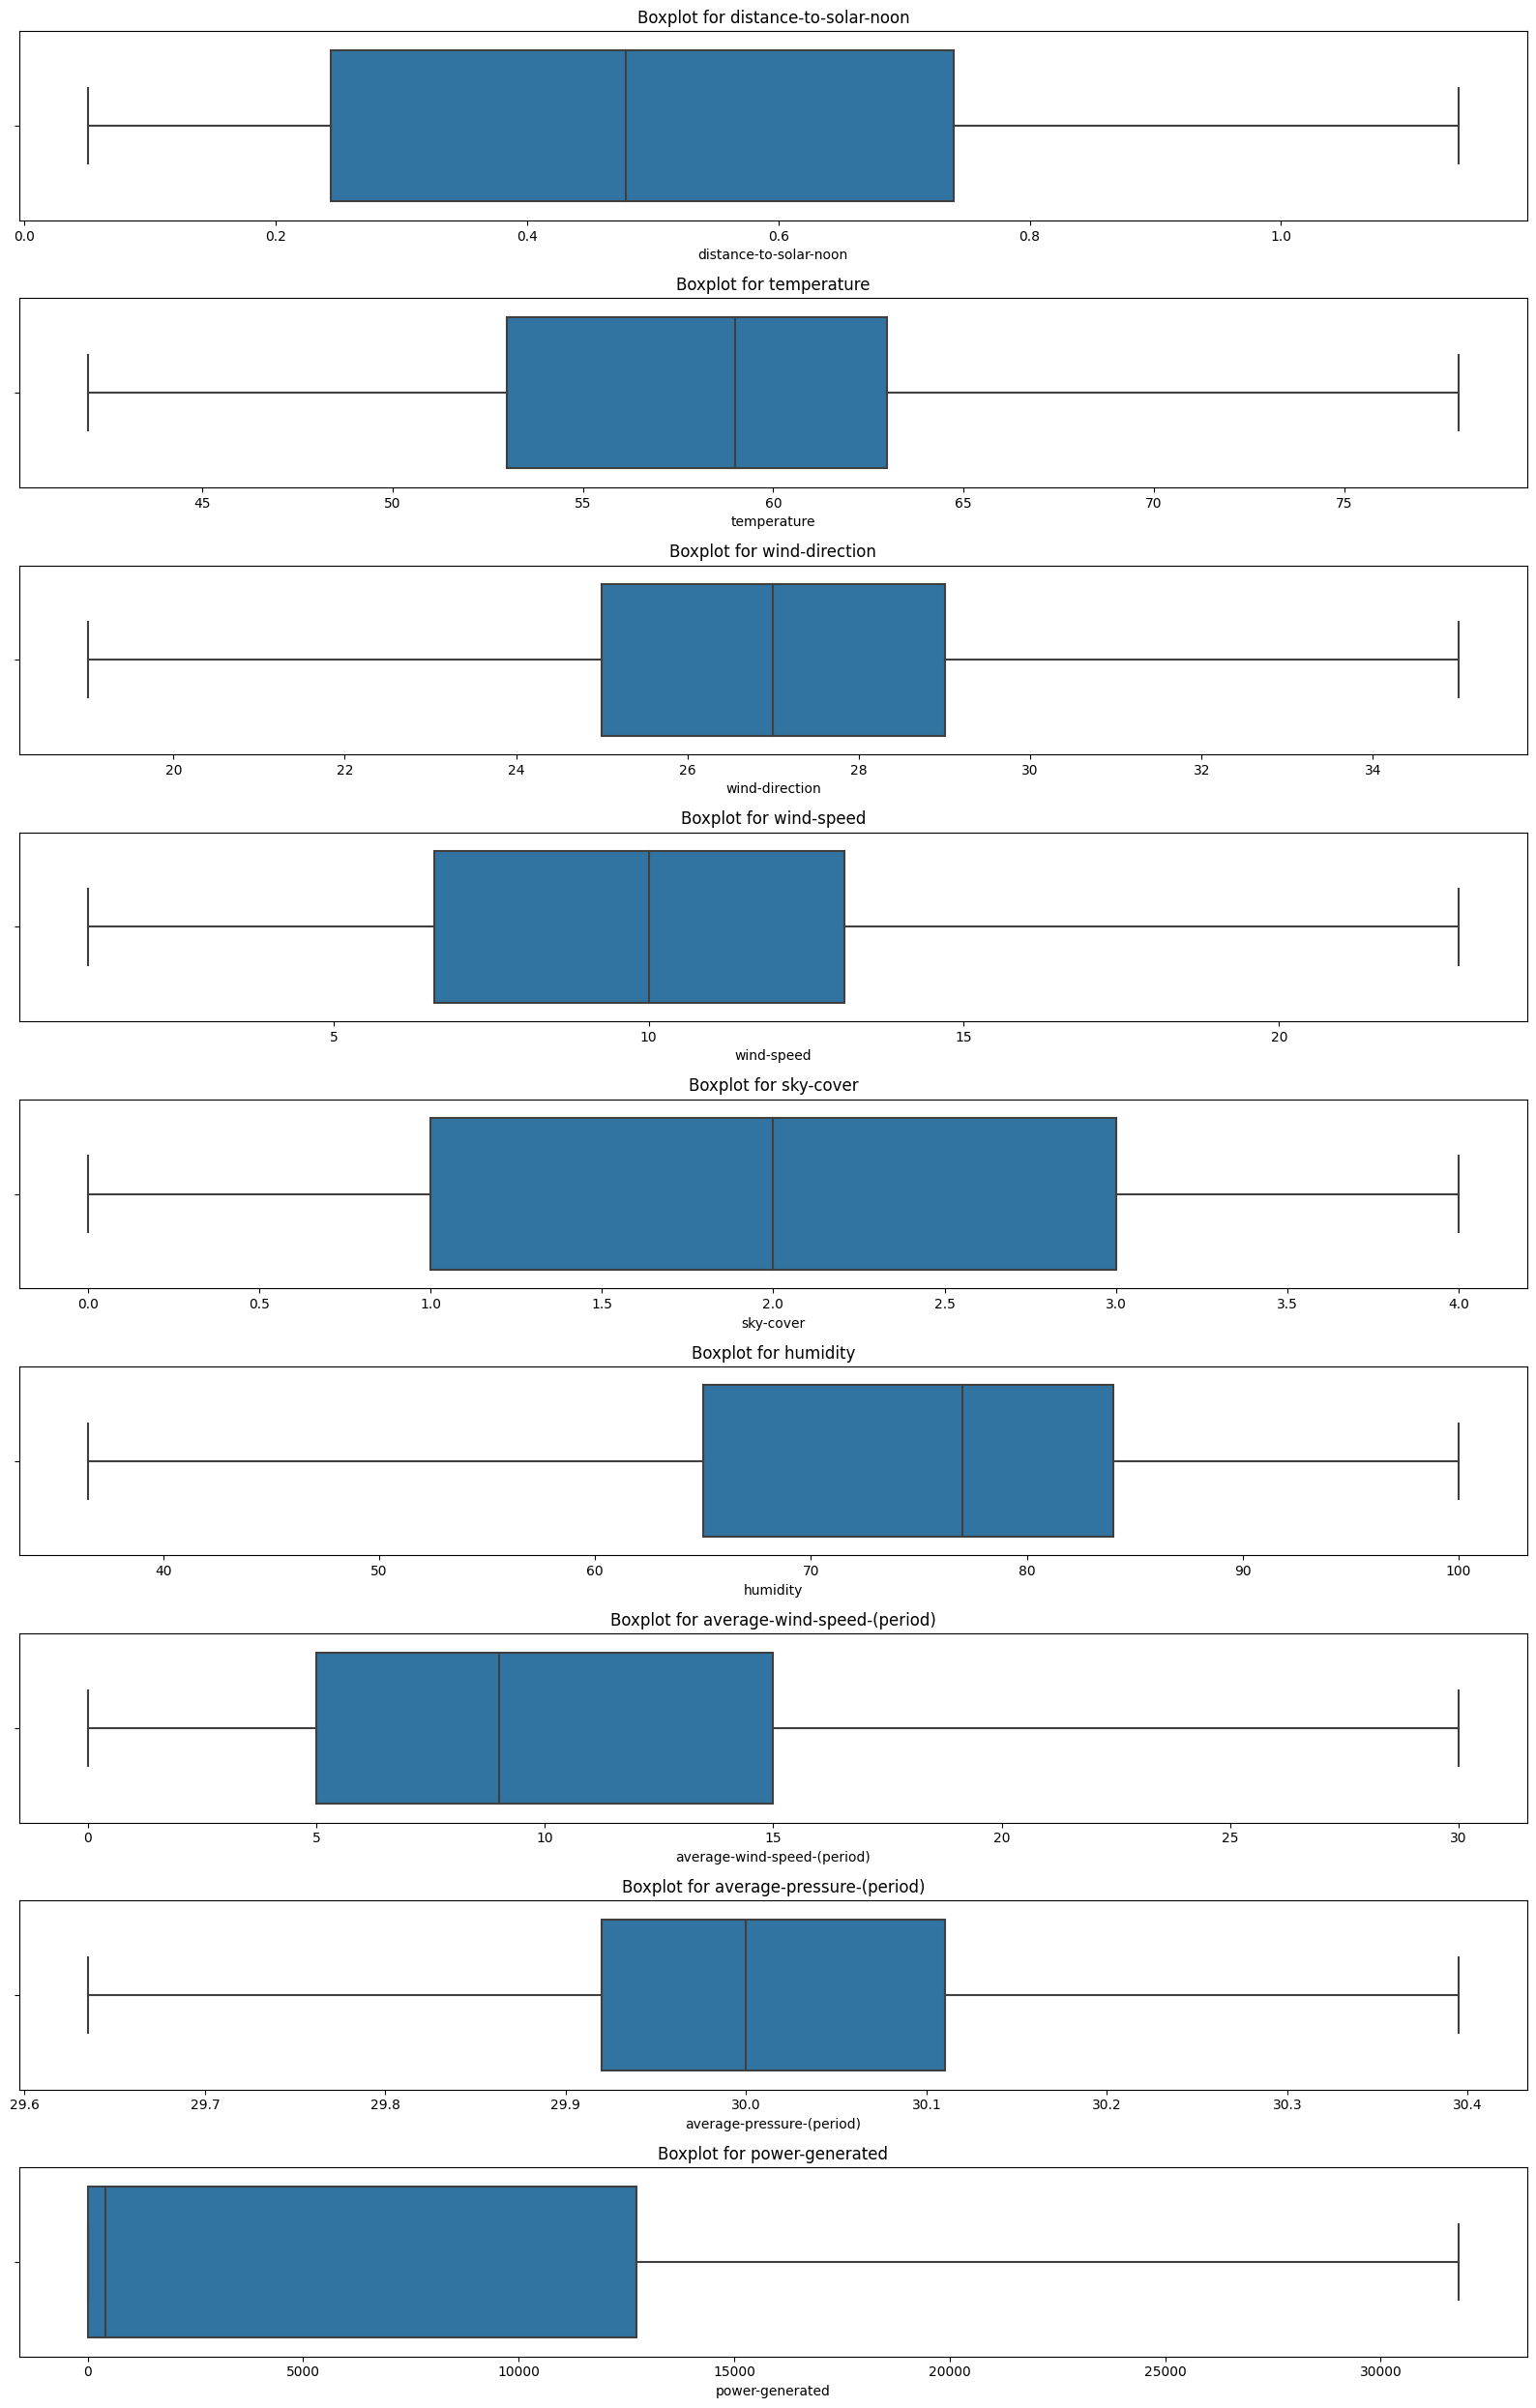

In [ ]:
# Numeric columns only
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(16, 25))
for i, col in enumerate(numeric_cols):
    plt.subplot(len(numeric_cols), 1, i + 1)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot for {col}')
plt.tight_layout()
plt.show()

### Heatmap

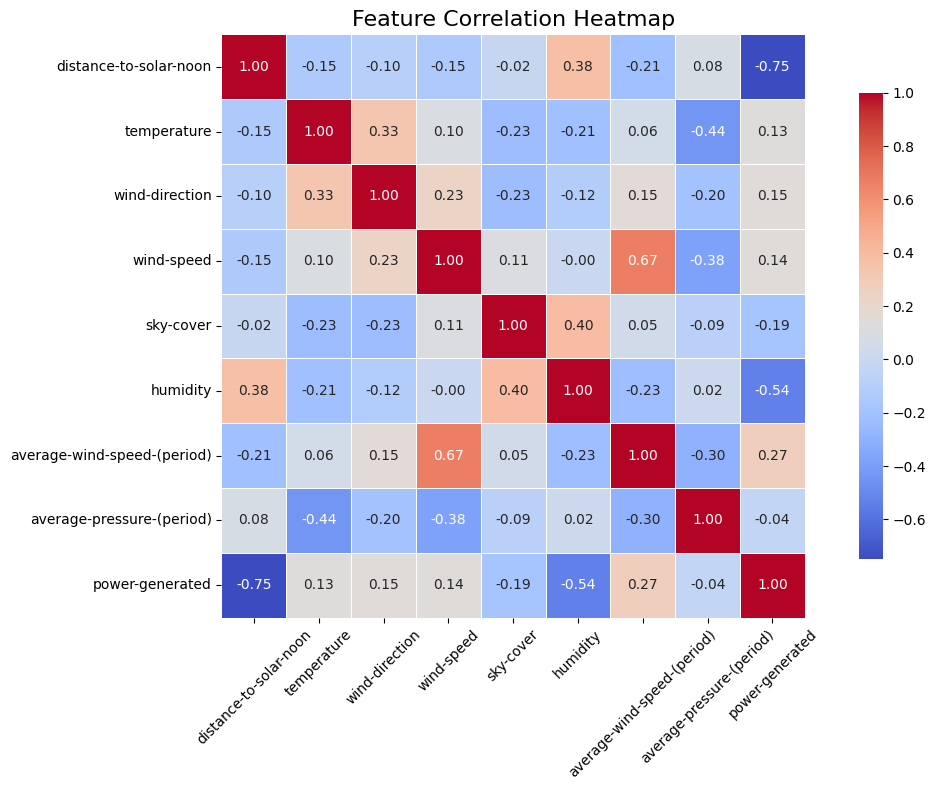

In [ ]:
#Calculate the correlation matrix
correlation_matrix = df.corr()

#Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,         # Show correlation values
    fmt=".2f",          # Format to 2 decimal places
    cmap="coolwarm",    # Color map
    square=True,        # Make cells square
    linewidths=0.5,     # Add lines between squares
    cbar_kws={"shrink": 0.8}  # Shrink color bar
)


#Add title and display
plt.title("Feature Correlation Heatmap", fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

### Correlation with Target Variable

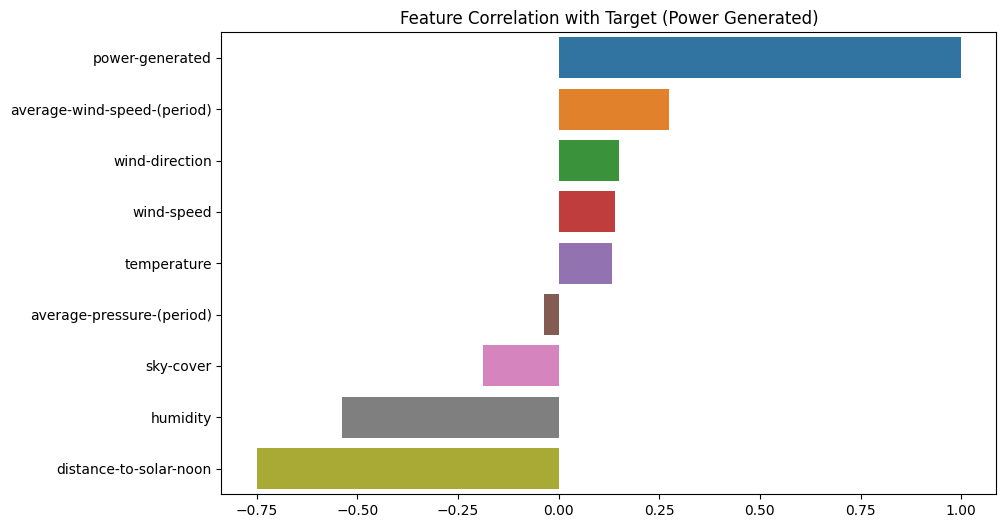

Top correlated features: ['average-wind-speed-(period)', 'wind-direction', 'wind-speed', 'temperature', 'average-pressure-(period)']


In [ ]:
# Correlation matrix
corr_matrix = df.corr()

# Plot correlation with target only
target_corr = corr_matrix['power-generated'].sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=target_corr.values, y=target_corr.index)
plt.title('Feature Correlation with Target (Power Generated)')
plt.show()

# Top correlated features
top_corr_features = target_corr[1:6].index.tolist()
print("Top correlated features:", top_corr_features)

In [ ]:
df.skew()

distance-to-solar-noon         0.211452
temperature                    0.125916
wind-direction                -0.759444
wind-speed                     0.320330
sky-cover                      0.080284
humidity                      -0.725126
average-wind-speed-(period)    0.552060
average-pressure-(period)      0.368321
power-generated                1.260141
dtype: float64

In [ ]:
df['power-generated'].isnull().sum()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2920 entries, 0 to 2919
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   distance-to-solar-noon       2920 non-null   float64
 1   temperature                  2920 non-null   float64
 2   wind-direction               2920 non-null   float64
 3   wind-speed                   2920 non-null   float64
 4   sky-cover                    2920 non-null   float64
 5   humidity                     2920 non-null   float64
 6   average-wind-speed-(period)  2920 non-null   float64
 7   average-pressure-(period)    2920 non-null   float64
 8   power-generated              2920 non-null   float64
dtypes: float64(9)
memory usage: 205.4 KB


### Handling categorical columns - Encoding

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2920 entries, 0 to 2919
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   distance-to-solar-noon       2920 non-null   float64
 1   temperature                  2920 non-null   float64
 2   wind-direction               2920 non-null   float64
 3   wind-speed                   2920 non-null   float64
 4   sky-cover                    2920 non-null   float64
 5   humidity                     2920 non-null   float64
 6   average-wind-speed-(period)  2920 non-null   float64
 7   average-pressure-(period)    2920 non-null   float64
 8   power-generated              2920 non-null   float64
dtypes: float64(9)
memory usage: 205.4 KB


In [ ]:
columns = df.columns

In [ ]:
for col in columns:
    print(f"{col}: {df[col].nunique()}")

distance-to-solar-noon: 2660
temperature: 37
wind-direction: 17
wind-speed: 155
sky-cover: 5
humidity: 56
average-wind-speed-(period): 25
average-pressure-(period): 76
power-generated: 1423


In [ ]:
df['sky-cover'].unique()

array([0., 1., 3., 4., 2.])

## Note:
- sky-cover seems to be a categorical column, so better encode it

### Onehot encoding

In [ ]:
df = pd.get_dummies(df, columns=['sky-cover'], drop_first=True)

In [ ]:
df['sky-cover_1.0'].unique()

array([0, 1], dtype=uint8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2920 entries, 0 to 2919
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   distance-to-solar-noon       2920 non-null   float64
 1   temperature                  2920 non-null   float64
 2   wind-direction               2920 non-null   float64
 3   wind-speed                   2920 non-null   float64
 4   humidity                     2920 non-null   float64
 5   average-wind-speed-(period)  2920 non-null   float64
 6   average-pressure-(period)    2920 non-null   float64
 7   power-generated              2920 non-null   float64
 8   sky-cover_1.0                2920 non-null   uint8  
 9   sky-cover_2.0                2920 non-null   uint8  
 10  sky-cover_3.0                2920 non-null   uint8  
 11  sky-cover_4.0                2920 non-null   uint8  
dtypes: float64(8), uint8(4)
memory usage: 194.0 KB


In [ ]:
df.skew()

distance-to-solar-noon         0.211452
temperature                    0.125916
wind-direction                -0.759444
wind-speed                     0.320330
humidity                      -0.725126
average-wind-speed-(period)    0.552060
average-pressure-(period)      0.368321
power-generated                1.260141
sky-cover_1.0                  1.061124
sky-cover_2.0                  1.924290
sky-cover_3.0                  1.511520
sky-cover_4.0                  1.463790
dtype: float64

###  Feature Scaling

### Using StandardScaler

In [ ]:
from sklearn.preprocessing import StandardScaler

# Separate features and target
X = df.drop('power-generated', axis=1)
y = df['power-generated']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# convert back to DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

X_scaled_df.head()

,distance-to-solar-noon,temperature,wind-direction,wind-speed,humidity,average-wind-speed-(period),average-pressure-(period),sky-cover_1.0,sky-cover_2.0,sky-cover_3.0,sky-cover_4.0
0,1.196765,1.539688,0.426856,-0.539694,0.087755,-0.292971,-1.414580,-0.601615,-0.425711,-0.497859,-0.507481
1,0.420310,1.539688,0.426856,-0.539694,0.226321,-0.710615,-1.199392,-0.601615,-0.425711,-0.497859,-0.507481
2,-0.356146,1.539688,0.426856,-0.539694,-0.258662,-1.406688,-0.912474,-0.601615,-0.425711,-0.497859,-0.507481
3,-1.132602,1.539688,0.426856,-0.539694,-2.579652,-1.406688,-0.769015,-0.601615,-0.425711,-0.497859,-0.507481
4,-1.469066,1.539688,0.426856,-0.539694,-2.579652,-0.989044,-0.912474,-0.601615,-0.425711,-0.497859,-0.507481


### Multicollinearity Check using VIF

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create DataFrame for VIF
X_vif = pd.DataFrame(X_scaled, columns=X.columns)

vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

print("Variance Inflation Factors:")
print(vif_data.sort_values(by="VIF", ascending=False))

Variance Inflation Factors:
                        Feature       VIF
10                sky-cover_4.0  2.382852
7                 sky-cover_1.0  2.123780
3                    wind-speed  2.117471
5   average-wind-speed-(period)  2.096111
9                 sky-cover_3.0  2.077370
8                 sky-cover_2.0  1.894362
4                      humidity  1.608025
1                   temperature  1.516852
6     average-pressure-(period)  1.514920
0        distance-to-solar-noon  1.287557
2                wind-direction  1.248044


### Interpretation:
All VIF values are below the threshold of 5, indicating no significant multicollinearity among the predictors. This suggests that the features are sufficiently independent from each other, and the regression model should not suffer from inflated coefficient variances due to multicollinearity.

### Feature Selection Based on Model Importance

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest Regressor
model = RandomForestRegressor(random_state=42)
model.fit(X_scaled_df, y)

RandomForestRegressor(random_state=42)

In [ ]:
# Get Feature Importances
importances = model.feature_importances_
feature_names = X_scaled_df.columns

In [ ]:
# Create a DataFrame for visualization
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

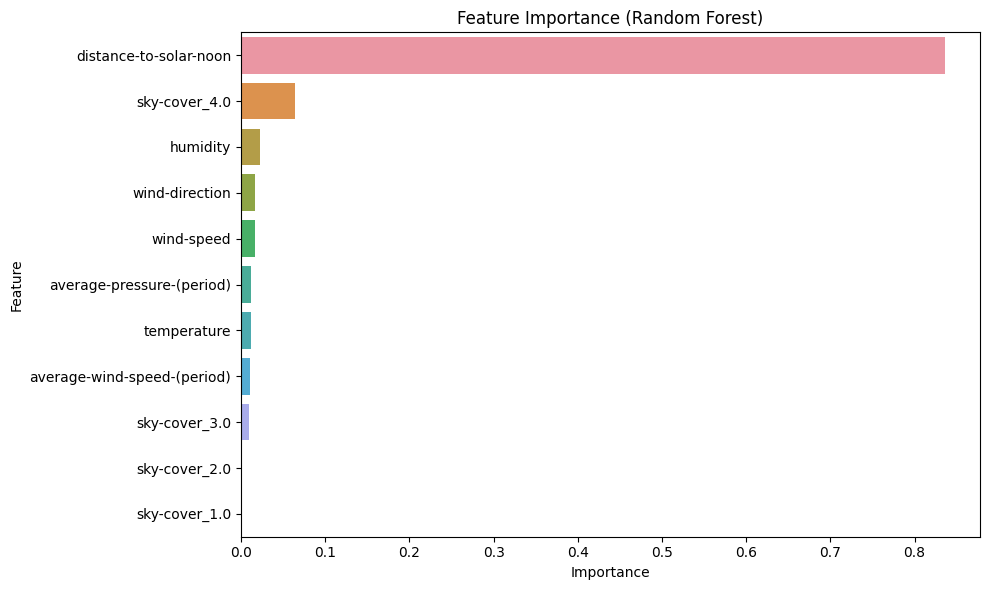

In [ ]:
#Plot Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance (Random Forest)')
plt.tight_layout()
plt.show()

In [ ]:
X_scaled_df.skew()

distance-to-solar-noon         0.211452
temperature                    0.125916
wind-direction                -0.759444
wind-speed                     0.320330
humidity                      -0.725126
average-wind-speed-(period)    0.552060
average-pressure-(period)      0.368321
sky-cover_1.0                  1.061124
sky-cover_2.0                  1.924290
sky-cover_3.0                  1.511520
sky-cover_4.0                  1.463790
dtype: float64

## Train test split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Split into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled_df, y, test_size=0.2, random_state=42
)

In [ ]:
# Check shapes
print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (2336, 11)
Test shape: (584, 11)


# Model Building

###  Linear Models
- Linear Regressor

- Elastic Net Regressor

### Non-Linear Models
- Support Vector Regressor (RBF Kernel)

- Random Forest Regressor

- XGBoost Regressor

- LightGBM Regressor



## Evaluation function for Any Regressor

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score

def evaluate_model(model, X_train, y_train, X_test, y_test, model_name=None, results_dict=None, cv_folds=5):
    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Metrics for train
    r2_train = r2_score(y_train, y_train_pred)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    mae_train = mean_absolute_error(y_train, y_train_pred)

    # Metrics for test
    r2_test = r2_score(y_test, y_test_pred)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    mae_test = mean_absolute_error(y_test, y_test_pred)

    # Store results
    if results_dict is not None and model_name:
        results_dict[model_name] = {
            'Train': {'R²': r2_train, 'RMSE': rmse_train, 'MAE': mae_train},
            'Test':  {'R²': r2_test,  'RMSE': rmse_test,  'MAE': mae_test},
        }

    # Print results
    print(f"\n{model_name or 'Model'} Results:")
    print(f"Train -> R²: {r2_train:.4f}, RMSE: {rmse_train:.4f}, MAE: {mae_train:.4f}")
    print(f"Test  -> R²: {r2_test:.4f}, RMSE: {rmse_test:.4f}, MAE: {mae_test:.4f}")

# Dictionary to hold all results
results = {}


## Linear Regressor

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import statsmodels.api as sm

In [ ]:
# Fit scikit-learn Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predict
y_pred_lr = linear_model.predict(X_test)

In [ ]:
# Evaluation
evaluate_model(linear_model, X_train, y_train, X_test, y_test, "Linear Regression", results)


Linear Regression Results:
Train -> R²: 0.6681, RMSE: 5842.6865, MAE: 4738.6044
Test  -> R²: 0.6398, RMSE: 6052.8131, MAE: 4849.1747


## Using statsmodels for Linear Regression

In [ ]:
# Add constant term for intercept
X_train_sm = sm.add_constant(X_train)

# Fit the OLS model
model_sm = sm.OLS(y_train, X_train_sm).fit()

# Print the full summary
model_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        power-generated   R-squared:                       0.668
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     425.4
Date:                Sun, 27 Jul 2025   Prob (F-statistic):               0.00
Time:                        16:20:51   Log-Likelihood:                -23575.
No. Observations:                2336   AIC:                         4.717e+04
Df Residuals:                    2324   BIC:                         4.724e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                        6983.8711    121.252     57.598      0.000    6746.098    7221.644
distance-to-solar-noon      -6376.1933    136.794    -46.612      0.000   -6644.444   -6107.943
temperature                  -364.4216    150.395     -2.423      0.015    -659.345     -69.499
wind-direction                298.4022    135.613      2.200      0.028      32.467     564.338
wind-speed                      2.3495    178.564      0.013      0.990    -347.811     352.510
humidity                    -2505.5568    154.673    -16.199      0.000   -2808.869   -2202.245
average-wind-speed-(period)   734.3285    175.938      4.174      0.000     389.317    1079.341
average-pressure-(period)     244.8325    149.123      1.642      0.101     -47.596     537.261
sky-cover_1.0                 493.2638    178.430      2.764      0.006     143.365     843.163
sky-cover_2.0                 108.1642    165.882      0.652      0.514    -217.128     433.457
sky-cover_3.0                -170.4816    175.332     -0.972      0.331    -514.305     173.342
sky-cover_4.0               -1203.3688    186.956     -6.437      0.000   -1569.987    -836.750
==============================================================================
Omnibus:                       11.998   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               11.205
Skew:                           0.132   Prob(JB):                      0.00369
Kurtosis:                       2.788   Cond. No.                         4.02
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# Add constant to test set
X_test_sm = sm.add_constant(X_test)

# Make predictions
y_pred_sm = model_sm.predict(X_test_sm)

In [ ]:
r2 = r2_score(y_test, y_pred_sm)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_sm))
mae = mean_absolute_error(y_test, y_pred_sm)

print(f"R² Score: {r2:.4f}")
print(f"RMSE    : {rmse:.4f}")
print(f"MAE     : {mae:.4f}")

R² Score: 0.6398
RMSE    : 6052.8131
MAE     : 4849.1747


### Step-by-Step Diagnostic Plots

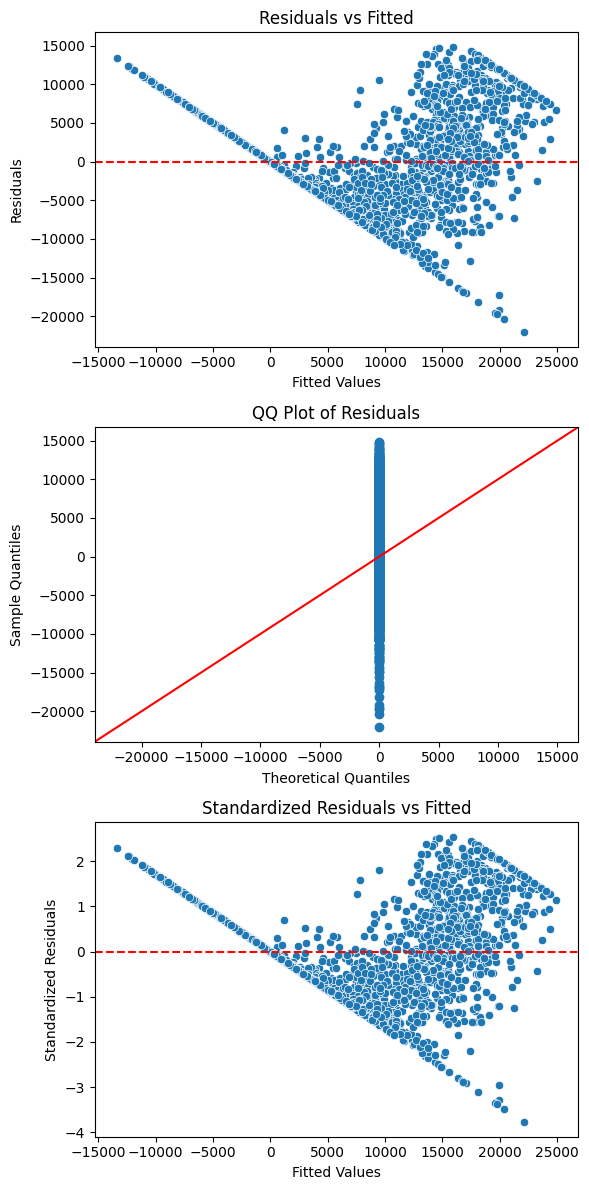

In [ ]:
import scipy.stats as stats


# Residuals and Fitted values
residuals = model_sm.resid
fitted_vals = model_sm.fittedvalues

# Standardized residuals
standardized_residuals = residuals / np.std(residuals)

# QQ plot (Normality of residuals)
fig, axes = plt.subplots(3, 1, figsize=(6, 12))

# 1. Residuals vs Fitted
sns.scatterplot(x=fitted_vals, y=residuals, ax=axes[0])
axes[0].axhline(0, color='red', linestyle='--')
axes[0].set_title("Residuals vs Fitted")
axes[0].set_xlabel("Fitted Values")
axes[0].set_ylabel("Residuals")

# 2. QQ Plot
sm.qqplot(residuals, line='45', ax=axes[1])
axes[1].set_title("QQ Plot of Residuals")

# 3. Standardized Residuals vs Fitted
sns.scatterplot(x=fitted_vals, y=standardized_residuals, ax=axes[2])
axes[2].axhline(0, color='red', linestyle='--')
axes[2].set_title("Standardized Residuals vs Fitted")
axes[2].set_xlabel("Fitted Values")
axes[2].set_ylabel("Standardized Residuals")

plt.tight_layout()
plt.show()


### Diagnostic Residual Analysis

Residual plots show a clear funnel-shaped, non-random pattern, indicating non-linearity and heteroscedasticity—both violations of linear regression assumptions.
The Q-Q plot reveals non-normal residuals with heavy tails, further invalidating linear model assumptions.
These findings confirm that linear models underfit the data, and a non-linear model is more appropriate.


## Elastic Net Regressor

In [ ]:
from sklearn.linear_model import ElasticNet

In [ ]:
# Create and fit the model
elastic_model = ElasticNet(alpha=0.01, l1_ratio=0.5, random_state=42)
elastic_model.fit(X_train, y_train)

ElasticNet(alpha=0.01, random_state=42)

In [ ]:
# Evaluate
evaluate_model(elastic_model,X_train, y_train, X_test, y_test, "Elastic Net Regression ", results)


Elastic Net Regression  Results:
Train -> R²: 0.6681, RMSE: 5842.7852, MAE: 4736.1544
Test  -> R²: 0.6398, RMSE: 6052.8860, MAE: 4847.1991


## SVR

In [ ]:
from sklearn.svm import SVR

In [ ]:
# Create and train the model (using RBF kernel)
svr = SVR(kernel='rbf', C=1000, gamma=0.1, epsilon=0.01)
svr.fit(X_train, y_train)

# Predict
y_pred_svr = svr.predict(X_test)

# Evaluate
evaluate_model(svr,X_train, y_train, X_test, y_test, "SVR (RBF)", results)


SVR (RBF) Results:
Train -> R²: 0.8472, RMSE: 3964.4213, MAE: 2369.9512
Test  -> R²: 0.8153, RMSE: 4334.1480, MAE: 2580.0169


## RandomForest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# Create and train model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict
y_pred_rf = rf_model.predict(X_test)

# Evaluate
evaluate_model(rf_model,X_train, y_train, X_test, y_test, "Random Forest", results)



Random Forest Results:
Train -> R²: 0.9881, RMSE: 1107.0725, MAE: 512.5357
Test  -> R²: 0.8851, RMSE: 3418.3187, MAE: 1528.6576


## XGBoost

In [ ]:
from xgboost import XGBRegressor

# Create and fit model
xgb = XGBRegressor(random_state=42, n_estimators=100)
xgb.fit(X_train, y_train)

# Predict
y_pred_xgb = xgb.predict(X_test)

# Evaluate
evaluate_model(xgb,X_train, y_train, X_test, y_test, "XGBoost", results)



XGBoost Results:
Train -> R²: 0.9990, RMSE: 324.3140, MAE: 191.3958
Test  -> R²: 0.9046, RMSE: 3115.7648, MAE: 1533.5797


### Hyperparamter tuning - using Randomisedsearchcv

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
from scipy.stats import randint, uniform

In [ ]:
param_dist = {
    'n_estimators': randint(100, 1000),            # Wider range
    'max_depth': randint(3, 15),                   # Allow deeper trees
    'learning_rate': uniform(0.005, 0.3),          # Include very low rates
    'subsample': uniform(0.5, 0.5),                # 0.5 to 1.0
    'colsample_bytree': uniform(0.5, 0.5),         # 0.5 to 1.0
    'min_child_weight': randint(1, 20),            # Try wider range
    'gamma': uniform(0, 1),                        # Increase range
    'reg_alpha': uniform(0, 2),                    # L1 reg
    'reg_lambda': uniform(0, 2)                    # L2 reg
}


In [ ]:
xgb_model = XGBRegressor(random_state=42)

random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=300,                 # Try 100 different combinations
    scoring='r2',               # Optimize R²
    cv=5,                       # 5-fold CV
    verbose=1,
    n_jobs=-1,
    random_state=42
)

random_search.fit(X_train, y_train)
best_xgb = random_search.best_estimator_

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


In [ ]:
print("Best Parameters:", random_search.best_params_)

Best Parameters: {'colsample_bytree': 0.878540601021228, 'gamma': 0.37785054927578643, 'learning_rate': 0.07732544969888956, 'max_depth': 11, 'min_child_weight': 14, 'n_estimators': 100, 'reg_alpha': 1.9081020545174447, 'reg_lambda': 1.21234926890176, 'subsample': 0.6143214027517314}


## Rebuilding the XGBoost model

In [ ]:
best_params = {
    'colsample_bytree': 0.878540601021228,
    'gamma': 0.37785054927578643,
    'learning_rate': 0.07732544969888956,
    'max_depth': 11,
    'min_child_weight': 14,
    'n_estimators': 100,
    'reg_alpha': 1.9081020545174447,
    'reg_lambda': 1.21234926890176,
    'subsample': 0.6143214027517314
}

# Create and fit the model with best params
xgb_tuned = XGBRegressor(random_state=42, **best_params)
xgb_tuned.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.878540601021228, device=None,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0.37785054927578643,
             grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.07732544969888956,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=11, max_leaves=None,
             min_child_weight=14, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
# Predict
y_pred_xgb_tuned = xgb_tuned.predict(X_test)

# Evaluate
evaluate_model(xgb_tuned,X_train, y_train, X_test, y_test, "XGBoost_tuned", results)


XGBoost_tuned Results:
Train -> R²: 0.9736, RMSE: 1648.6951, MAE: 817.5070
Test  -> R²: 0.8948, RMSE: 3270.9365, MAE: 1573.9825


## LGBM

In [ ]:
from lightgbm import LGBMRegressor

# Train model
lgbm = LGBMRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
lgbm.fit(X_train, y_train)

# Predict
y_pred_lgbm = lgbm.predict(X_test)

# Evaluate
evaluate_model(lgbm,X_train, y_train, X_test, y_test, "LightGBM", results)

C:\Users\Jananisri\anaconda3\Lib\site-packages\dask\dataframe\_pyarrow_compat.py:23: UserWarning: You are using pyarrow version 11.0.0 which is known to be insecure. See https://www.cve.org/CVERecord?id=CVE-2023-47248 for further details. Please upgrade to pyarrow>=14.0.1 or install pyarrow-hotfix to patch your current version.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000617 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 632
[LightGBM] [Info] Number of data points in the train set: 2336, number of used features: 11
[LightGBM] [Info] Start training from score 6932.976455

LightGBM Results:
Train -> R²: 0.9807, RMSE: 1410.1422, MAE: 736.3332
Test  -> R²: 0.8856, RMSE: 3411.4319, MAE: 1609.5478


In [ ]:
# Define parameter distributions
param_dist = {
    'n_estimators': randint(200, 1000),
    'learning_rate': uniform(0.005, 0.3),
    'max_depth': randint(3, 15),
    'num_leaves': randint(20, 150),
    'min_child_samples': randint(5, 100),
    'subsample': uniform(0.6, 0.4),
    'colsample_bytree': uniform(0.6, 0.4),
    'reg_alpha': uniform(0, 2),
    'reg_lambda': uniform(0, 2)
}


In [ ]:
# Set up Randomized Search
random_search = RandomizedSearchCV(
    estimator=lgbm,
    param_distributions=param_dist,
    n_iter=300,
    scoring='r2',
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

In [ ]:
# Fit to training data
random_search.fit(X_train, y_train)
best_lgbm = random_search.best_estimator_

Fitting 5 folds for each of 300 candidates, totalling 1500 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000283 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 632
[LightGBM] [Info] Number of data points in the train set: 2336, number of used features: 11
[LightGBM] [Info] Start training from score 6932.976455
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Lig

## Rebuilding the LGBoost model

In [ ]:
# Best parameters from  RandomizedSearchCV
best_params = {
    'colsample_bytree': 0.932213782561936,
    'learning_rate': 0.02561384975548033,
    'max_depth': 12,
    'min_child_samples': 42,
    'n_estimators': 822,
    'num_leaves': 131,
    'reg_alpha': 1.935720069690061,
    'reg_lambda': 0.5908895549548405,
    'subsample': 0.9076892591352534
}

# Build the model
lgbm_tuned = LGBMRegressor(random_state=42, **best_params)

# Fit the model
lgbm_tuned.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000745 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 632
[LightGBM] [Info] Number of data points in the train set: 2336, number of used features: 11
[LightGBM] [Info] Start training from score 6932.976455
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

LGBMRegressor(colsample_bytree=0.932213782561936,
              learning_rate=0.02561384975548033, max_depth=12,
              min_child_samples=42, n_estimators=822, num_leaves=131,
              random_state=42, reg_alpha=1.935720069690061,
              reg_lambda=0.5908895549548405, subsample=0.9076892591352534)

In [ ]:
y_pred_lgb_tuned = lgbm_tuned.predict(X_test)

#Evaluate
evaluate_model(lgbm_tuned,X_train, y_train, X_test, y_test, "lgbm_tuned", results)


lgbm_tuned Results:
Train -> R²: 0.9790, RMSE: 1470.3223, MAE: 773.0072
Test  -> R²: 0.8907, RMSE: 3334.2952, MAE: 1638.4578


## Model Performance Comparison

In [ ]:
# Flatten the results dictionary
df_results = pd.DataFrame([
    {
        'Model': model,
        'Train R²': metrics['Train']['R²'],
        'Train RMSE': metrics['Train']['RMSE'],
        'Train MAE': metrics['Train']['MAE'],
        'Test R²': metrics['Test']['R²'],
        'Test RMSE': metrics['Test']['RMSE'],
        'Test MAE': metrics['Test']['MAE'],
    }
    for model, metrics in results.items()
])


In [ ]:
# Sort based on highest Test R²
df_results = df_results.sort_values(by='Test R²', ascending=False)
df_results

,Model,Train R²,Train RMSE,Train MAE,Test R²,Test RMSE,Test MAE
4,XGBoost,0.998978,324.313978,191.395817,0.904551,3115.764835,1533.579694
5,XGBoost_tuned,0.973575,1648.695057,817.506975,0.894807,3270.936535,1573.982476
7,lgbm_tuned,0.978984,1470.322302,773.007241,0.890693,3334.295177,1638.457811
6,LightGBM,0.980669,1410.142205,736.333211,0.885577,3411.431853,1609.547815
3,Random Forest,0.988085,1107.072484,512.535665,0.885114,3418.318705,1528.657641
2,SVR (RBF),0.847213,3964.421327,2369.951202,0.815308,4334.148016,2580.016861
0,Linear Regression,0.668142,5842.686537,4738.604363,0.639790,6052.813075,4849.174724
1,Elastic Net Regression,0.668131,5842.785243,4736.154382,0.639781,6052.886037,4847.199051


In [ ]:
# Sort based on least Test MAE
df_results = df_results.sort_values(by='Test MAE', ascending=True)
df_results

,Model,Train R²,Train RMSE,Train MAE,Test R²,Test RMSE,Test MAE
3,Random Forest,0.988085,1107.072484,512.535665,0.885114,3418.318705,1528.657641
4,XGBoost,0.998978,324.313978,191.395817,0.904551,3115.764835,1533.579694
5,XGBoost_tuned,0.973575,1648.695057,817.506975,0.894807,3270.936535,1573.982476
6,LightGBM,0.980669,1410.142205,736.333211,0.885577,3411.431853,1609.547815
7,lgbm_tuned,0.978984,1470.322302,773.007241,0.890693,3334.295177,1638.457811
2,SVR (RBF),0.847213,3964.421327,2369.951202,0.815308,4334.148016,2580.016861
1,Elastic Net Regression,0.668131,5842.785243,4736.154382,0.639781,6052.886037,4847.199051
0,Linear Regression,0.668142,5842.686537,4738.604363,0.639790,6052.813075,4849.174724


## Model Performance Comparison Report

XGBoost (Model 4) is the best model, with the highest R² and lowest RMSE/MAE on both train and test sets.
Tuned XGBoost (Model 5) slightly underperforms, suggesting possible overfitting.
Linear models (Model 0 & 1) perform poorly, unable to capture the dataset's complexity.


### Comparative Evaluation of Regression Models Based on R², RMSE, and MAE

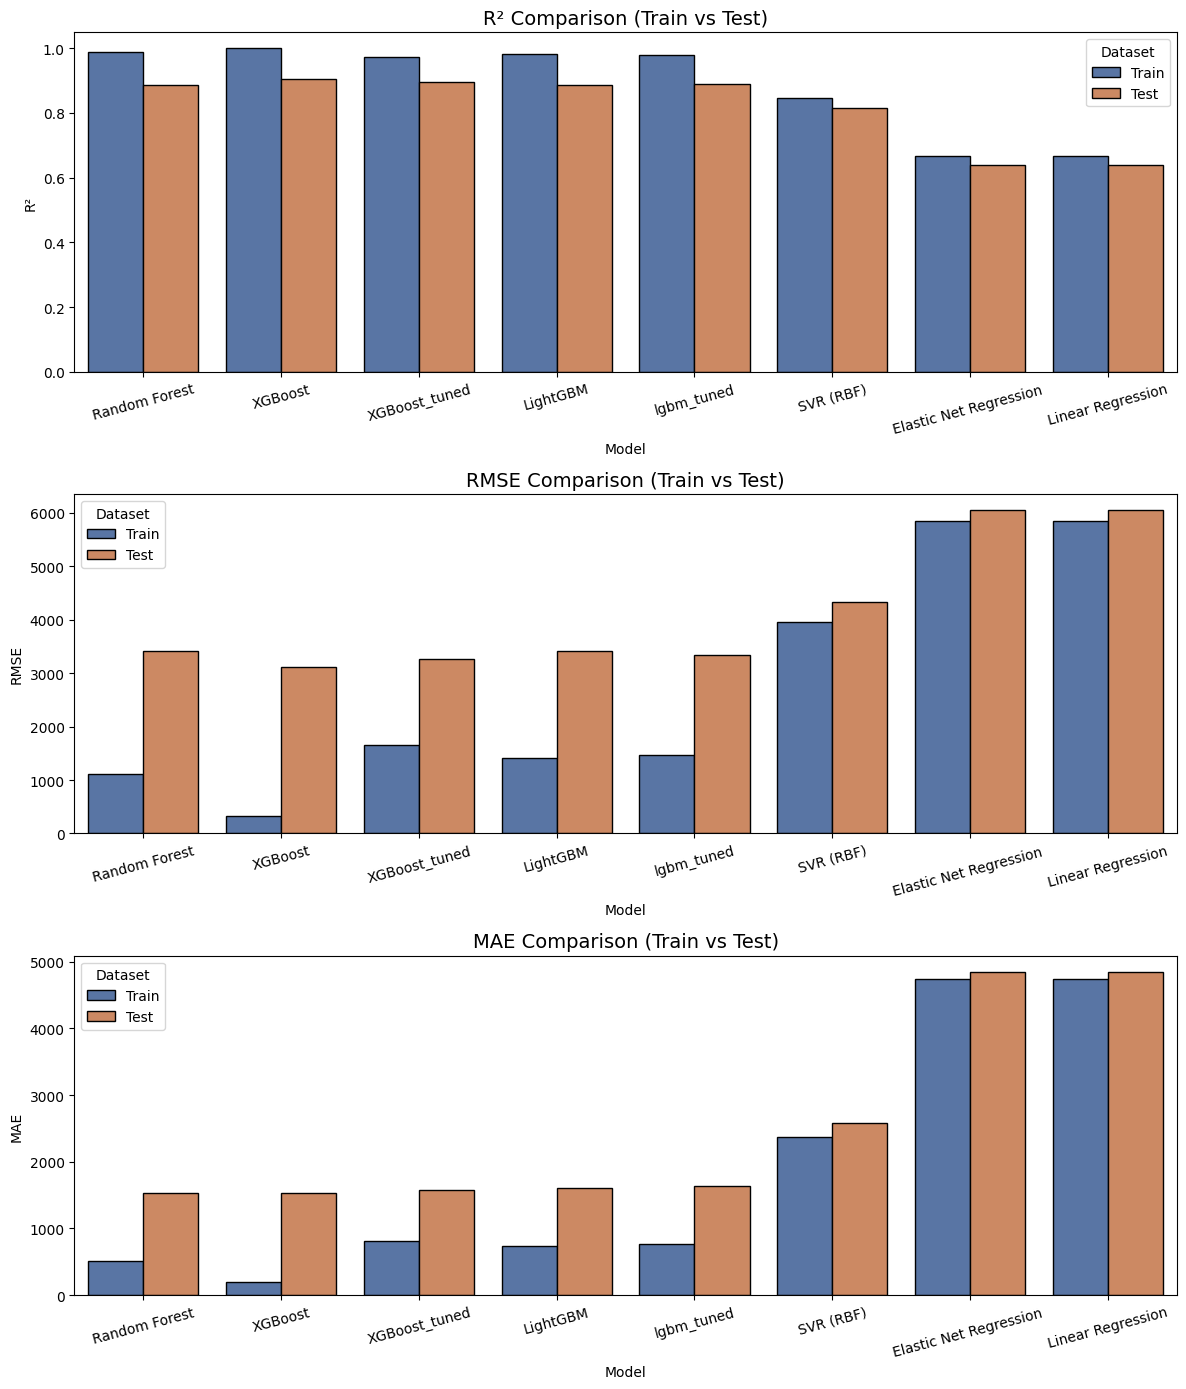

In [ ]:
# Melt and split
results_long = pd.melt(
    df_results,
    id_vars='Model',
    value_vars=['Train R²', 'Train RMSE', 'Train MAE', 'Test R²', 'Test RMSE', 'Test MAE'],
    var_name='Metric',
    value_name='Value'
)

# Split into "Train"/"Test" and "R²"/"RMSE"/"MAE"
results_long[['Dataset', 'Metric_Type']] = results_long['Metric'].str.split(' ', expand=True)

# Set up the figure
metrics_to_plot = ['R²', 'RMSE', 'MAE']
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 14), sharex=False)

for i, metric in enumerate(metrics_to_plot):
    sns.barplot(
        data=results_long[results_long['Metric_Type'] == metric],
        x='Model', y='Value', hue='Dataset', ax=axes[i],
        palette='deep', edgecolor='black'
    )
    axes[i].set_title(f'{metric} Comparison (Train vs Test)', fontsize=14)
    axes[i].set_ylabel(metric)
    axes[i].legend(title='Dataset')
    axes[i].tick_params(axis='x', rotation=15)

plt.tight_layout()
plt.show()


##  Actual vs Predicted Plot
The Actual vs Predicted plot shows how closely the model’s predictions align with true values, with ideal predictions lying along the 45-degree diagonal line.

### Actual vs Predicted scatter plots for the linear models (Linear regression, Elastic net regression)

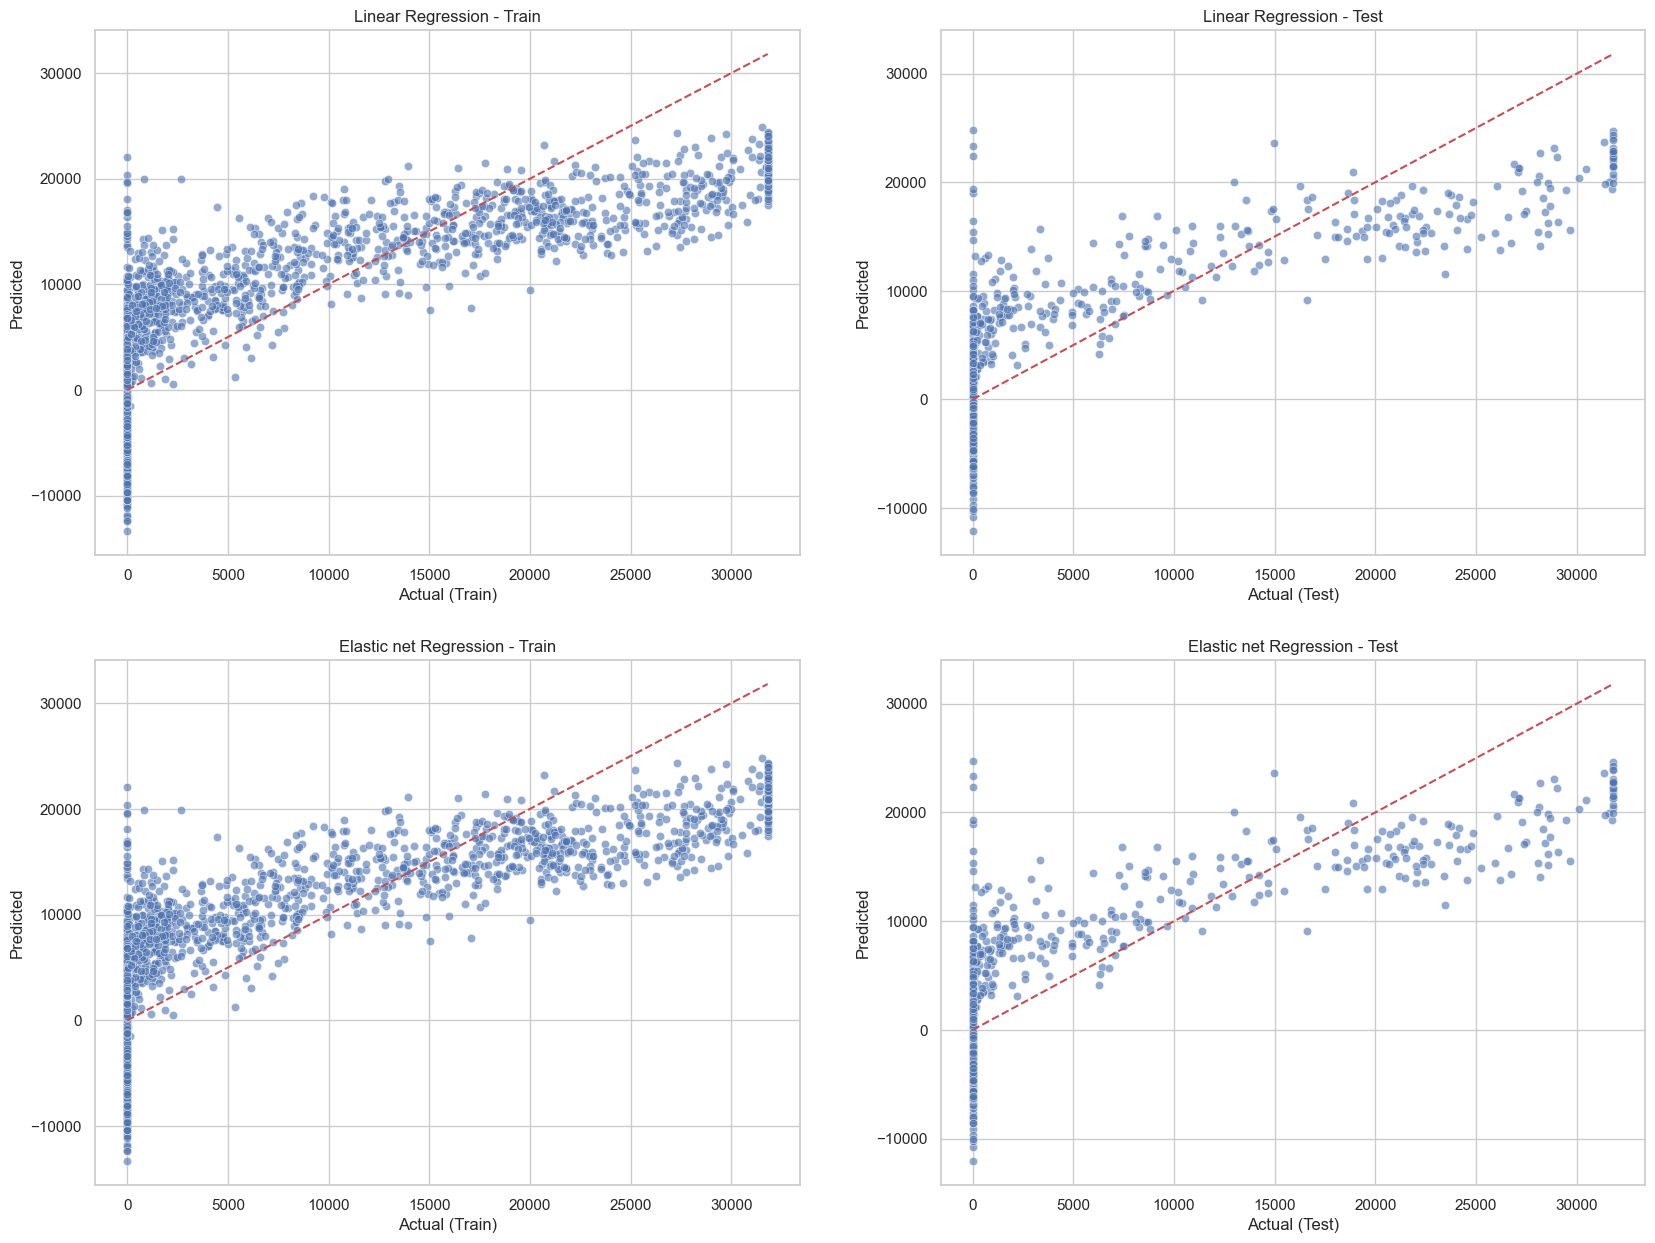

In [ ]:
# Predict on Train and Test sets
y_pred_lr_train = linear_model.predict(X_train)
y_pred_lr_test = linear_model.predict(X_test)

y_pred_elastic_train = elastic_model.predict(X_train)
y_pred_elastic_test = elastic_model.predict(X_test)

# Common style
sns.set(style="whitegrid")
plt.figure(figsize=(20, 15))

# ---------- Linear Regression ----------
# Train
plt.subplot(2, 2, 1)
sns.scatterplot(x=y_train, y=y_pred_lr_train, alpha=0.6)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--')
plt.xlabel("Actual (Train)")
plt.ylabel("Predicted")
plt.title("Linear Regression - Train")
plt.grid(True)

# Test
plt.subplot(2, 2, 2)
sns.scatterplot(x=y_test, y=y_pred_lr, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual (Test)")
plt.ylabel("Predicted")
plt.title("Linear Regression - Test")
plt.grid(True)

# ---------- Elastic net Regression ----------
# Train
plt.subplot(2, 2, 3)
sns.scatterplot(x=y_train, y=y_pred_elastic_train, alpha=0.6)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--')
plt.xlabel("Actual (Train)")
plt.ylabel("Predicted")
plt.title("Elastic net Regression - Train")
plt.grid(True)

# Test
plt.subplot(2, 2, 4)
sns.scatterplot(x=y_test, y=y_pred_elastic_test, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual (Test)")
plt.ylabel("Predicted")
plt.title("Elastic net Regression - Test")
plt.grid(True)




### Actual vs Predicted scatter plots for the three non linear models (Random Forest, XGBoost, and LightGBM)

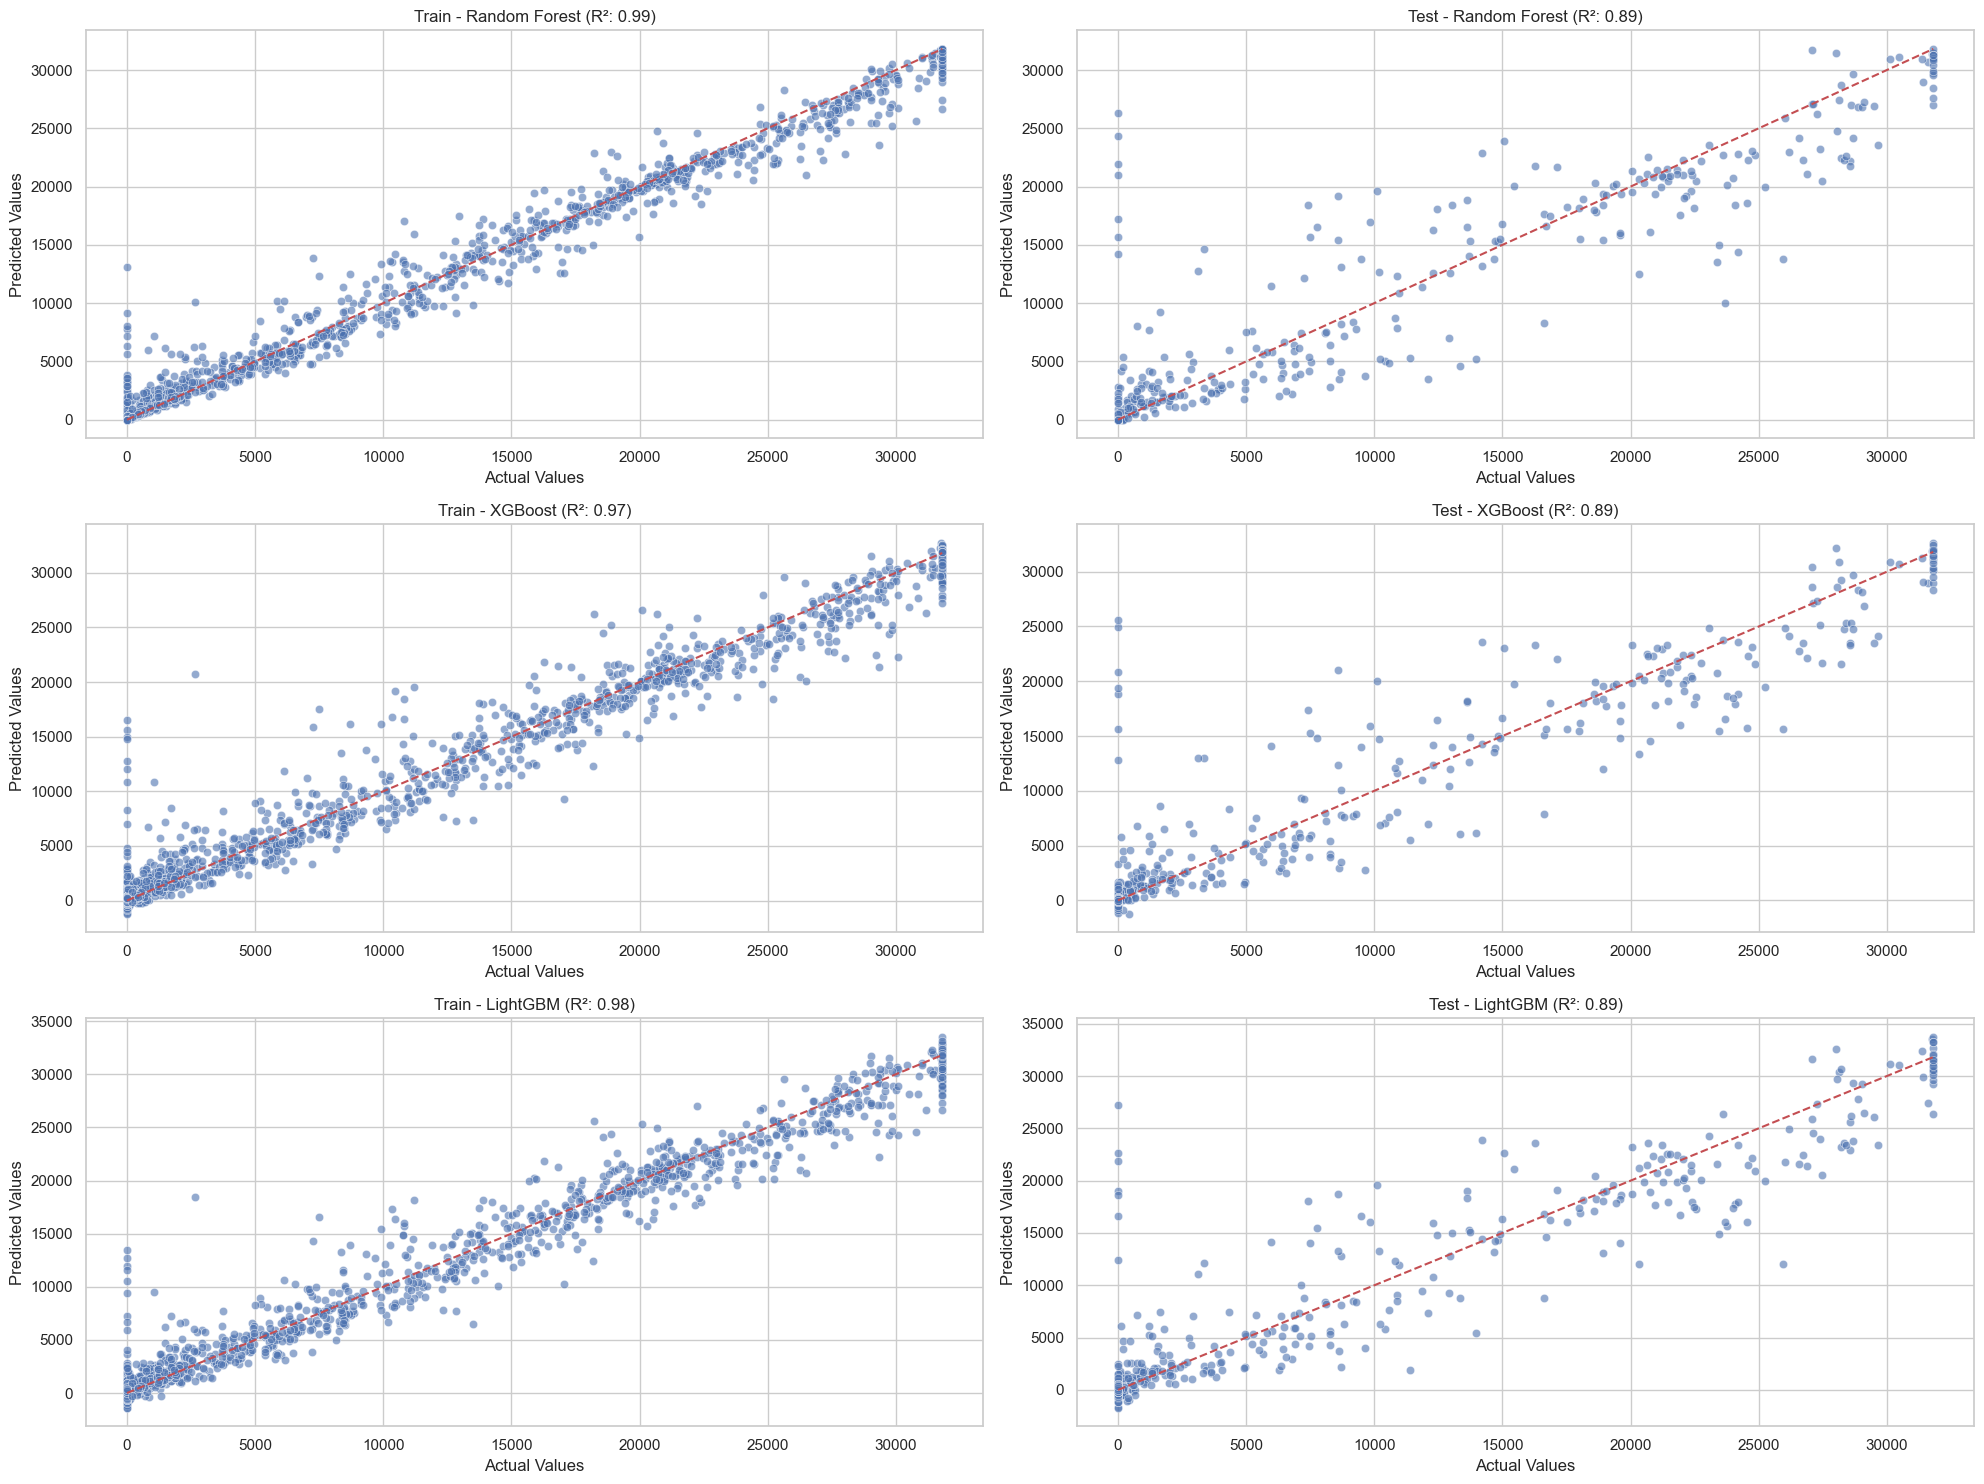

In [ ]:
# Predictions
y_train_pred_rf = rf_model.predict(X_train)
y_test_pred_rf  = rf_model.predict(X_test)

y_train_pred_xgb = xgb_tuned.predict(X_train)
y_test_pred_xgb  = xgb_tuned.predict(X_test)

y_train_pred_lgbm = lgbm_tuned.predict(X_train)
y_test_pred_lgbm  = lgbm_tuned.predict(X_test)

# Plot Style
sns.set(style="whitegrid")
plt.figure(figsize=(20, 15))

# ---------- RANDOM FOREST ----------
# Train
plt.subplot(3, 2, 1)
sns.scatterplot(x=y_train, y=y_train_pred_rf, alpha=0.6)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title(f"Train - Random Forest (R²: {r2_score(y_train, y_train_pred_rf):.2f})")
plt.grid(True)

# Test
plt.subplot(3, 2, 2)
sns.scatterplot(x=y_test, y=y_test_pred_rf, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title(f"Test - Random Forest (R²: {r2_score(y_test, y_test_pred_rf):.2f})")
plt.grid(True)

# ---------- XGBOOST ----------
# Train
plt.subplot(3, 2, 3)
sns.scatterplot(x=y_train, y=y_train_pred_xgb, alpha=0.6)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title(f"Train - XGBoost (R²: {r2_score(y_train, y_train_pred_xgb):.2f})")
plt.grid(True)

# Test
plt.subplot(3, 2, 4)
sns.scatterplot(x=y_test, y=y_test_pred_xgb, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title(f"Test - XGBoost (R²: {r2_score(y_test, y_test_pred_xgb):.2f})")
plt.grid(True)

# ---------- LIGHTGBM ----------
# Train
plt.subplot(3, 2, 5)
sns.scatterplot(x=y_train, y=y_train_pred_lgbm, alpha=0.6)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title(f"Train - LightGBM (R²: {r2_score(y_train, y_train_pred_lgbm):.2f})")
plt.grid(True)

# Test
plt.subplot(3, 2, 6)
sns.scatterplot(x=y_test, y=y_test_pred_lgbm, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title(f"Test - LightGBM (R²: {r2_score(y_test, y_test_pred_lgbm):.2f})")
plt.grid(True)

plt.tight_layout()
plt.show()


### Report
Linear models like Linear Regression and Elastic Net show predictions clustered near the mean and poorly aligned with the diagonal, indicating underfitting.
Random Forest fits training data very well but shows mild overfitting with wider spread on test data.
XGBoost and LightGBM deliver strong fits on both train and test sets, closely following the diagonal line.
Overall, non-linear ensemble models generalize better and capture the target distribution more effectively.


## Residual Plot
The Residual Plot shows how prediction errors are distributed, helping detect patterns or heteroscedasticity that indicate model bias or misspecification.

### Residual Plot for linear models

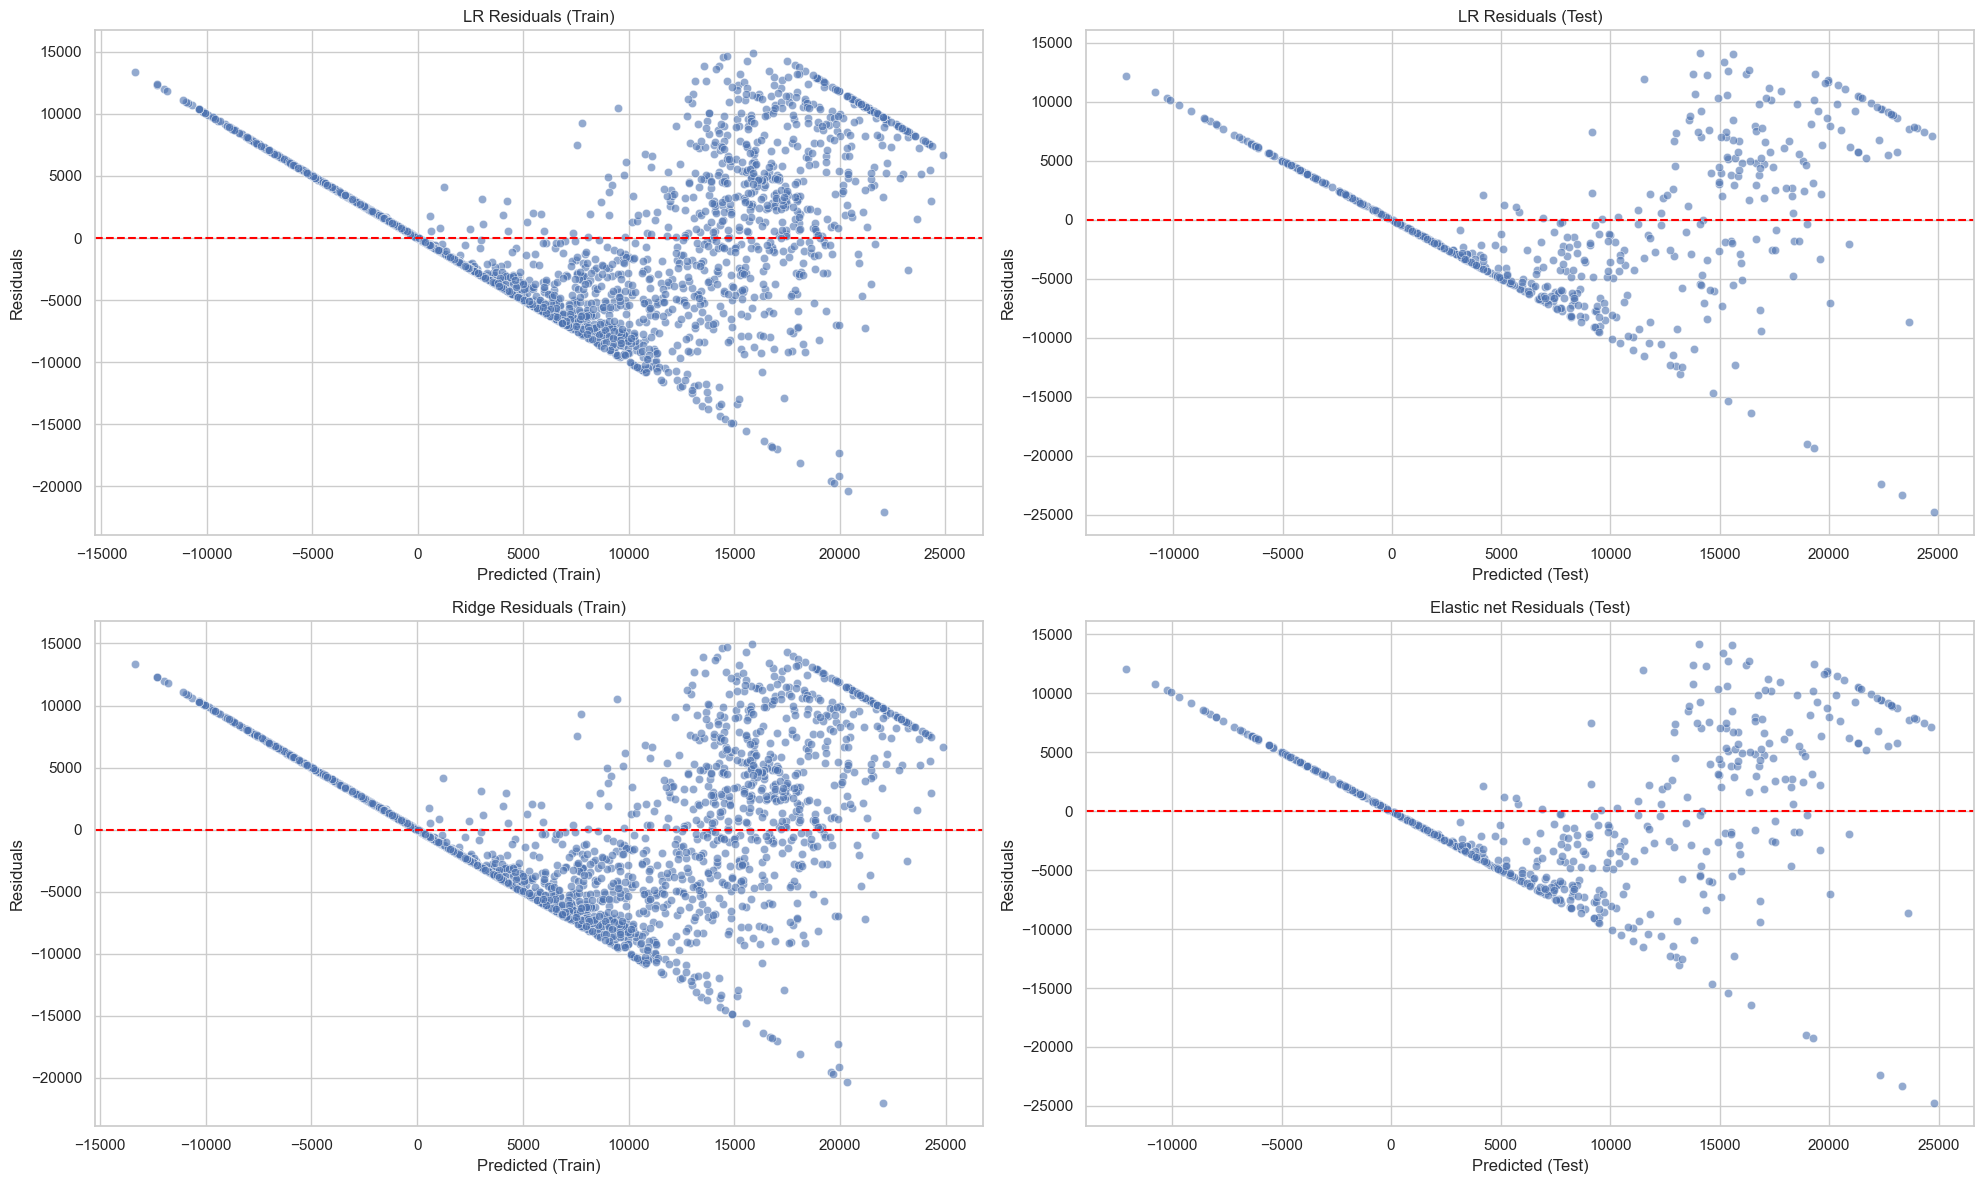

In [ ]:
# Calculate residuals
residuals_lr_train = y_train - y_pred_lr_train
residuals_lr_test = y_test - y_pred_lr_test

residuals_elastic_train = y_train - y_pred_elastic_train
residuals_elastic_test = y_test - y_pred_elastic_test


# Set common plot style
sns.set(style="whitegrid")
plt.figure(figsize=(20, 12))

# ----------- Linear Regression ------------
# Train
plt.subplot(2, 2, 1)
sns.scatterplot(x=y_pred_lr_train, y=residuals_lr_train, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted (Train)")
plt.ylabel("Residuals")
plt.title("LR Residuals (Train)")

# Test
plt.subplot(2, 2, 2)
sns.scatterplot(x=y_pred_lr_test, y=residuals_lr_test, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted (Test)")
plt.ylabel("Residuals")
plt.title("LR Residuals (Test)")

# ----------- Elastic net Regression ------------
# Train
plt.subplot(2, 2, 3)
sns.scatterplot(x=y_pred_elastic_train, y=residuals_elastic_train, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted (Train)")
plt.ylabel("Residuals")
plt.title("Ridge Residuals (Train)")

# Test
plt.subplot(2, 2, 4)
sns.scatterplot(x=y_pred_elastic_test, y=residuals_elastic_test, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted (Test)")
plt.ylabel("Residuals")
plt.title("Elastic net Residuals (Test)")

plt.tight_layout()
plt.show()


### Residual Plot for non linear models

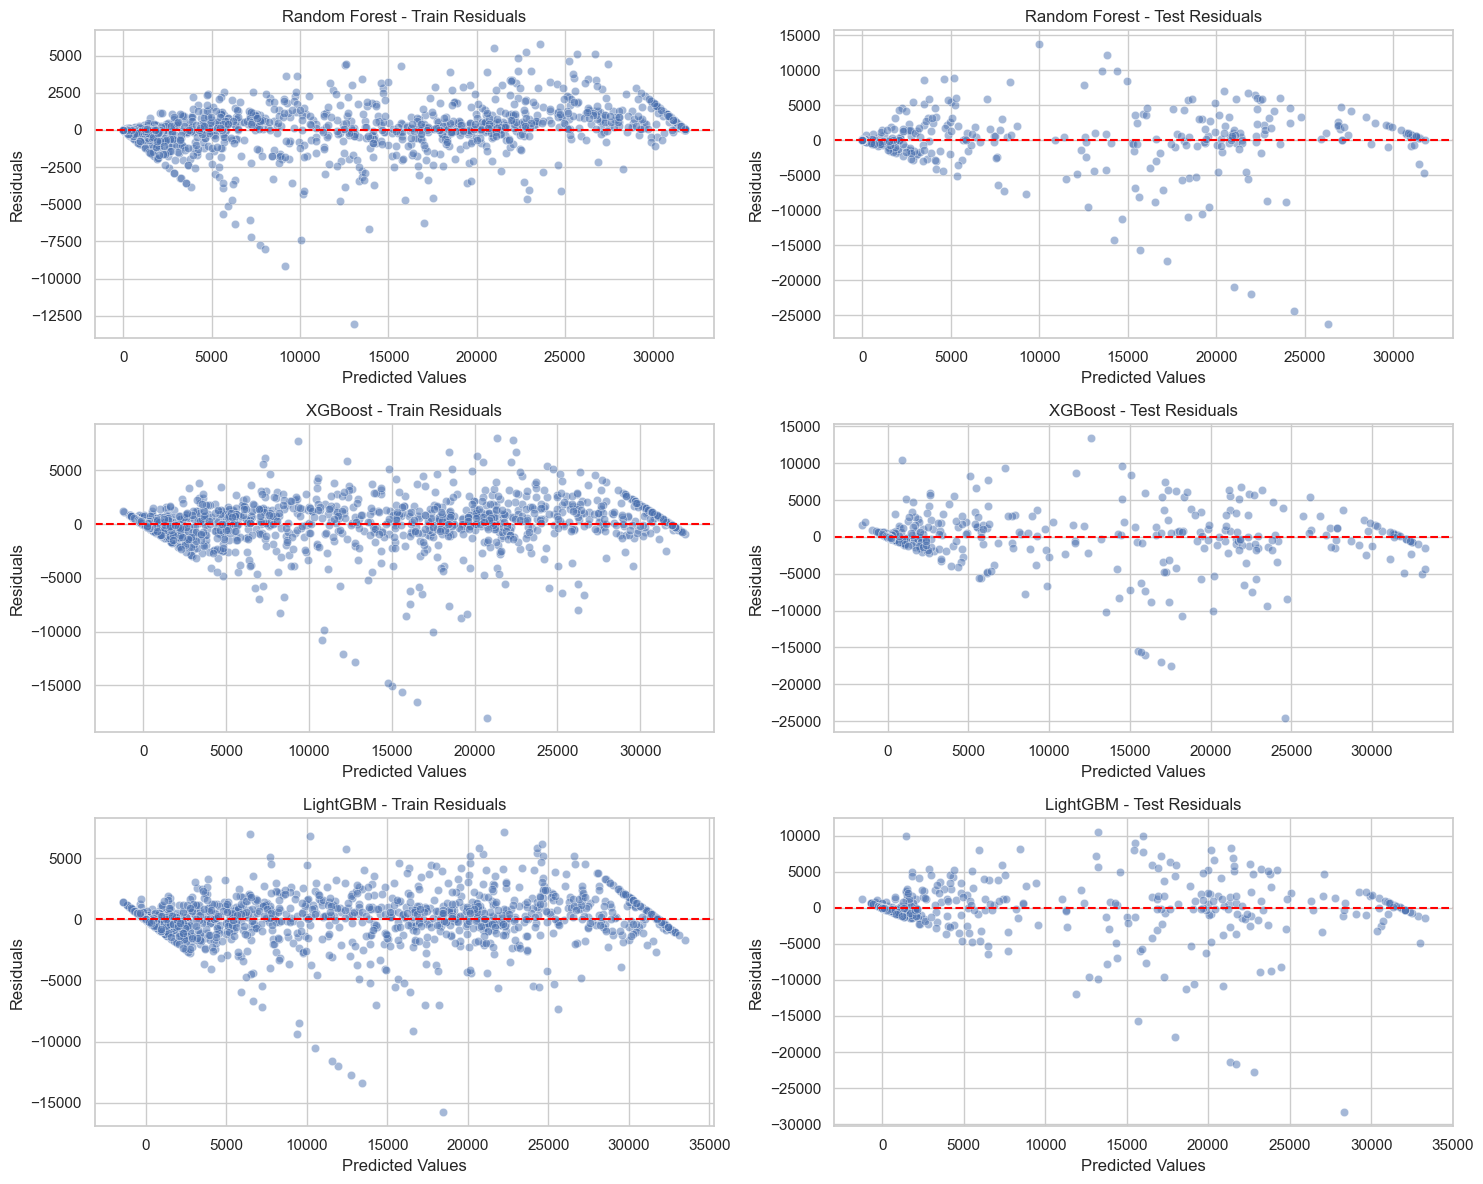

In [ ]:
# Residuals - Train
residuals_train_rf = y_train - y_train_pred_rf
residuals_train_xgb = y_train - y_train_pred_xgb
residuals_train_lgbm = y_train - y_train_pred_lgbm

# Residuals - Test
residuals_test_rf = y_test - y_pred_rf
residuals_test_xgb = y_test - y_pred_xgb
residuals_test_lgbm = y_test - y_pred_lgbm


sns.set(style="whitegrid")
fig, axs = plt.subplots(3, 2, figsize=(15, 12))

# Helper function
def plot_residuals(ax, x, y, title):
    sns.scatterplot(x=x, y=y, alpha=0.5, ax=ax)
    ax.axhline(0, color='red', linestyle='--')
    ax.set_xlabel("Predicted Values")
    ax.set_ylabel("Residuals")
    ax.set_title(title)
    ax.grid(True)

# Random Forest
plot_residuals(axs[0, 0], y_train_pred_rf, residuals_train_rf, "Random Forest - Train Residuals")
plot_residuals(axs[0, 1], y_pred_rf, residuals_test_rf, "Random Forest - Test Residuals")

# XGBoost
plot_residuals(axs[1, 0], y_train_pred_xgb, residuals_train_xgb, "XGBoost - Train Residuals")
plot_residuals(axs[1, 1], y_pred_xgb, residuals_test_xgb, "XGBoost - Test Residuals")

# LightGBM
plot_residuals(axs[2, 0], y_train_pred_lgbm, residuals_train_lgbm, "LightGBM - Train Residuals")
plot_residuals(axs[2, 1], y_pred_lgbm, residuals_test_lgbm, "LightGBM - Test Residuals")

plt.tight_layout()
plt.show()


### Report:
Linear models (Linear, Ridge, Elastic Net) show curved, funnel-shaped residuals, indicating heteroscedasticity and non-linearity.
They underfit the data, with poor residual distribution on both train and test sets.
Random Forest overfits, with tight train residuals but wider, skewed errors on the test set.
XGBoost and LightGBM show well-centered residuals and better generalization, with XGBoost performing slightly better.

## Learning Curve Plot

In [ ]:
models = {
    "Linear Regression": linear_model,
    "ElasticNet": elastic_model,
    "XGBoost": xgb_tuned,
    "LightGBM": lgbm_tuned,
    "Random Forest": rf_model
}

In [ ]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import KFold

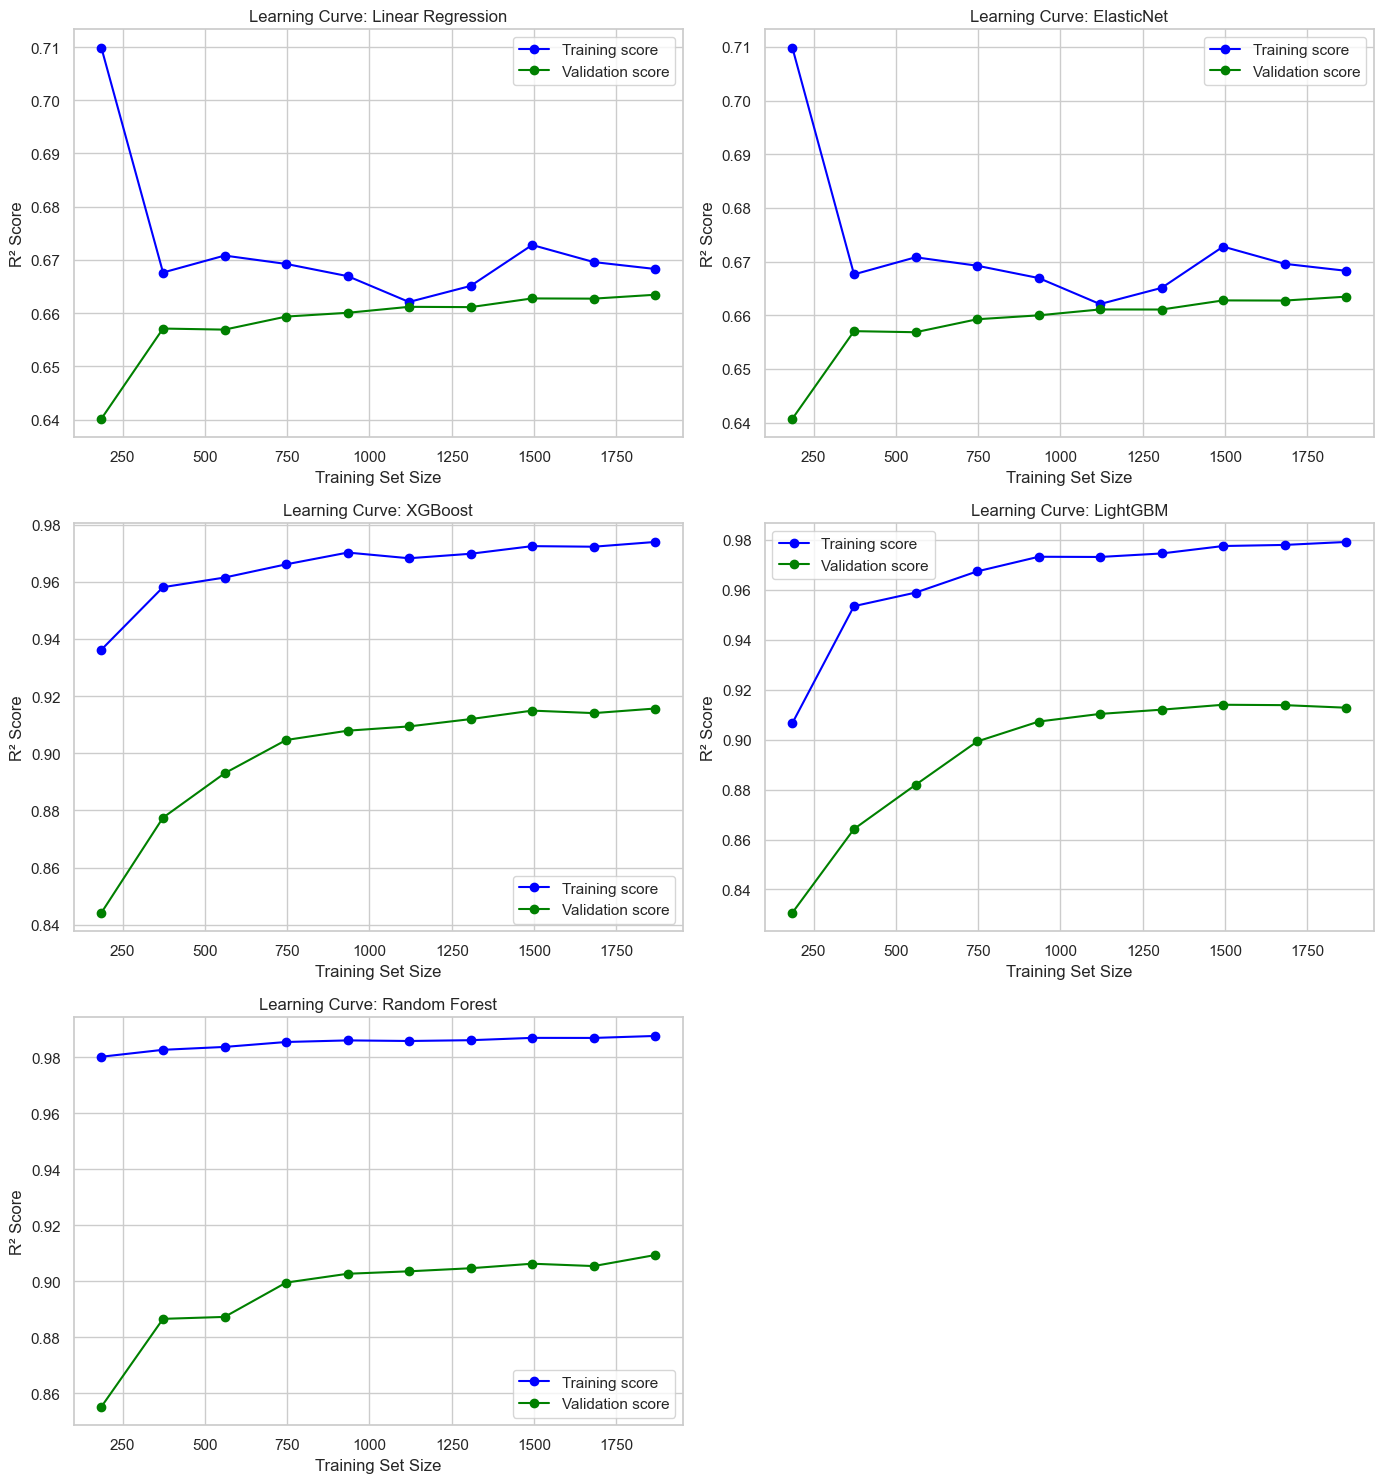

In [ ]:
def plot_learning_curves_grid(models, X, y, cols=2):
    rows = int(np.ceil(len(models) / cols))
    fig, axes = plt.subplots(rows, cols, figsize=(cols * 7, rows * 5))
    axes = axes.flatten()  # to index easily

    for i, (name, model) in enumerate(models.items()):
        train_sizes, train_scores, test_scores = learning_curve(
            model, X, y,
            train_sizes=np.linspace(0.1, 1.0, 10),
            cv=KFold(n_splits=5, shuffle=True, random_state=42),
            scoring='r2',
            n_jobs=-1
        )

        train_mean = np.mean(train_scores, axis=1)
        test_mean = np.mean(test_scores, axis=1)

        ax = axes[i]
        ax.plot(train_sizes, train_mean, 'o-', color="blue", label="Training score")
        ax.plot(train_sizes, test_mean, 'o-', color="green", label="Validation score")
        ax.set_title(f"Learning Curve: {name}")
        ax.set_xlabel("Training Set Size")
        ax.set_ylabel("R² Score")
        ax.grid(True)
        ax.legend(loc="best")

    # Hide any unused subplots
    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

# Call the function
plot_learning_curves_grid(models, X_train, y_train, cols=2)


## Summary of the learning curves (training vs validation R² scores across training set sizes):
Linear models (Linear Regression, Elastic Net) show low training and validation R² scores with minimal improvement, indicating underfitting.
XGBoost and LightGBM show strong performance, with high training scores and validation R² stabilizing around 0.91.
Random Forest achieves near-perfect training fit but has the largest gap, suggesting mild overfitting.
Overall, ensemble models benefit more from increased data and generalize better than linear models.

### Deploy: